In [1]:
import pandas as pd
import os
import re
import nltk
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

import pandas as pd
import numpy as np
import time

from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.preprocessing.text import Tokenizer, one_hot
from keras.preprocessing.sequence import pad_sequences

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import matplotlib.pyplot as plt


In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/bjit/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
tokens = nltk.word_tokenize("I eat rice")
print(tokens[0])
grams = ngrams(tokens,2)
print(list(grams))

I
[('I', 'eat'), ('eat', 'rice')]


In [4]:
# from nltk.tokenize import word_tokenize
# from nltk.util import ngrams

# def get_ngrams(text, n ):
#     text = re.split(r"\W+",str(text))
#     joined_text = " ".join(text)
# #     n_grams = ngrams(word_tokenize(text), n)
# #     return [ ' '.join(grams) for grams in n_grams]
#     return joined_text
          
          
# from nltk.tokenize import word_tokenize
# from nltk.util import ngrams

def get_ngrams(text,n):
    text = re.split(r"\W+",str(text))
    print("original text",text)
#     text = text[0]
    text = " ".join(text)
    tokens = nltk.word_tokenize(text)
    joined_text = " ".join(tokens)
    
#     stemming = PorterStemmer()
#     joined_text = [stemming.stem(w) for w in joined_text]
    
    print("Joined text", joined_text)
    return joined_text
    
#     n_grams = ngrams(word_tokenize(text), n)
    

#     grams = ''
#     for gram in n_grams:
#         print(gram)
#         for g in gram:
#             print(g)
#             if len(grams) == 0:
#                 grams = g
#                 print("grams here",grams)
#             else:
#                 grams = grams + ',' + g
#                 print("haha",grams)
#     if len(grams) == 0:
#         grams = text
#     return grams

In [5]:
# result = get_ngrams("www.facebook.com", 0)

In [6]:
# result

In [7]:
def apply_cleaning_function_to_list(X):
    cleaned_X = []
    for element in X:
        cleaned_X.append(get_ngrams(element,1))
    return cleaned_X

In [8]:
my_file = pd.read_csv("/home/bjit/testing_work/final__csv.csv")
my_file = my_file.sample(frac=1)
print(my_file.head())

                       URL                  Family  Class
9253   exgjwlrxqavfoebt.eu     emotet_dga_e3974ae7      1
74595       cnautonews.com                    Good      0
8160     k5h8k8gejen3n.net      ebury_dga_df7f59c6      1
2291   tpxfuxwvnqcmekoi.ru  blackhole_dga_1a83b22a      1
63654          hxbjpzs.com                    Good      0


In [9]:
my_file['URL'] = my_file['URL'].str.lower()

In [10]:
my_file['URL'][1]

'47faeb4f1b75a48499ba14e9b1cd895a.cz.cc'

In [11]:
my_file['clean_url'] = apply_cleaning_function_to_list(my_file['URL'])

original text ['exgjwlrxqavfoebt', 'eu']
Joined text exgjwlrxqavfoebt eu
original text ['cnautonews', 'com']
Joined text cnautonews com
original text ['k5h8k8gejen3n', 'net']
Joined text k5h8k8gejen3n net
original text ['tpxfuxwvnqcmekoi', 'ru']
Joined text tpxfuxwvnqcmekoi ru
original text ['hxbjpzs', 'com']
Joined text hxbjpzs com
original text ['btempurl', 'com']
Joined text btempurl com
original text ['sitestar', 'net']
Joined text sitestar net
original text ['pujlsujmtrdxi', 'ru']
Joined text pujlsujmtrdxi ru
original text ['t438ad00a6ad467f9bde4bbbb80827af6f', 'ws']
Joined text t438ad00a6ad467f9bde4bbbb80827af6f ws
original text ['uqurrexwdxmj', 'gen', 'in']
Joined text uqurrexwdxmj gen in
original text ['priceline', 'com']
Joined text priceline com
original text ['or', 'tz']
Joined text or tz
original text ['www', 'wbk5mt3tmu', 'org']
Joined text www wbk5mt3tmu org
original text ['olp', 'gr']
Joined text olp gr
original text ['installmentloansite', 'com']
Joined text installment

Joined text eusyslimdwfbm org
original text ['berkeleyside', 'com']
Joined text berkeleyside com
original text ['raptr', 'com']
Joined text raptr com
original text ['nopmqiau', 'net']
Joined text nopmqiau net
original text ['mobiforge', 'com']
Joined text mobiforge com
original text ['uemmjrernjwg', 'eu']
Joined text uemmjrernjwg eu
original text ['guancang', 'com']
Joined text guancang com
original text ['kimberlymed', 'com']
Joined text kimberlymed com
original text ['xx3e1b836', 'li']
Joined text xx3e1b836 li
original text ['mazda', 'co', 'jp']
Joined text mazda co jp
original text ['auuddvxi', 'eu']
Joined text auuddvxi eu
original text ['foodstandards', 'gov', 'au']
Joined text foodstandards gov au
original text ['uvhtgrbzhakassjwlummntqseswncnfdcqaqbmau', 'xyz']
Joined text uvhtgrbzhakassjwlummntqseswncnfdcqaqbmau xyz
original text ['agzkbhird', 'dyndns', 'org']
Joined text agzkbhird dyndns org
original text ['taian', 'gov', 'cn']
Joined text taian gov cn
original text ['gzfqmvn3

Joined text owswpiihldju eu
original text ['bk', 'ninja', 'com']
Joined text bk ninja com
original text ['o4khdchf2xzs5', 'com']
Joined text o4khdchf2xzs5 com
original text ['tfewn', 'org']
Joined text tfewn org
original text ['stevieawards', 'com']
Joined text stevieawards com
original text ['vendini', 'com']
Joined text vendini com
original text ['2lexxvtaz8xa72d5j5', 'cn']
Joined text 2lexxvtaz8xa72d5j5 cn
original text ['mkbpdsnauxgmvuwi', 'eu']
Joined text mkbpdsnauxgmvuwi eu
original text ['newsobserver', 'com']
Joined text newsobserver com
original text ['weatherzone', 'com', 'au']
Joined text weatherzone com au
original text ['uxm82av7y3uv64fwq2', 'net']
Joined text uxm82av7y3uv64fwq2 net
original text ['bugs', 'php', 'net']
Joined text bugs php net
original text ['kw6sgjdra5hzpnt36f', 'com']
Joined text kw6sgjdra5hzpnt36f com
original text ['russellwestbrookshoes', 'us']
Joined text russellwestbrookshoes us
original text ['aio', 'ld', 'com']
Joined text aio ld com
original tex

Joined text ugent be
original text ['dpedpei', 'biz']
Joined text dpedpei biz
original text ['xxf82e0d80', 'tm']
Joined text xxf82e0d80 tm
original text ['dealnews', 'com']
Joined text dealnews com
original text ['anywho', 'com']
Joined text anywho com
original text ['ula', 've']
Joined text ula ve
original text ['pvllnfltbhfmwgyp', 'com']
Joined text pvllnfltbhfmwgyp com
original text ['doqdoqc', 'biz']
Joined text doqdoqc biz
original text ['pnuejplrrvtytpbt', 'com']
Joined text pnuejplrrvtytpbt com
original text ['wcs', 'org']
Joined text wcs org
original text ['gameranx', 'com']
Joined text gameranx com
original text ['cicahyt', 'net']
Joined text cicahyt net
original text ['pav5zfb7eet3k', 'info']
Joined text pav5zfb7eet3k info
original text ['kwiksurveys', 'com']
Joined text kwiksurveys com
original text ['s077ae6d134f57c095b78f400710ee2ddc', 'hk']
Joined text s077ae6d134f57c095b78f400710ee2ddc hk
original text ['clariant', 'com']
Joined text clariant com
original text ['golknypm

Joined text coachfederation org
original text ['bloomsbury', 'com']
Joined text bloomsbury com
original text ['ranepa', 'ru']
Joined text ranepa ru
original text ['oup', 'com']
Joined text oup com
original text ['slate', 'com']
Joined text slate com
original text ['rpi8e3spmyhbomody3', 'com']
Joined text rpi8e3spmyhbomody3 com
original text ['fashionnetwork', 'com']
Joined text fashionnetwork com
original text ['v1', 'cn']
Joined text v1 cn
original text ['ziggo', 'nl']
Joined text ziggo nl
original text ['donaldjtrump', 'com']
Joined text donaldjtrump com
original text ['cdalcaoakfcdablb', 'com']
Joined text cdalcaoakfcdablb com
original text ['pc', 'magazin', 'de']
Joined text pc magazin de
original text ['gentoo', 'wiki', 'com']
Joined text gentoo wiki com
original text ['motul', 'com']
Joined text motul com
original text ['phetrsensinaix', 'com']
Joined text phetrsensinaix com
original text ['answersister', 'net']
Joined text answersister net
original text ['olouyxfxq', 'net']
Join

Joined text w1ib4l2rkle3 com
original text ['skyrock', 'net']
Joined text skyrock net
original text ['sa47c0831c34e6350243abe05f117d1c89', 'to']
Joined text sa47c0831c34e6350243abe05f117d1c89 to
original text ['4d20cf403f29fa4e375de4522b2a3cd2', 'cz', 'cc']
Joined text 4d20cf403f29fa4e375de4522b2a3cd2 cz cc
original text ['4bd291d5db6741a52fda854a82571007', 'co', 'cc']
Joined text 4bd291d5db6741a52fda854a82571007 co cc
original text ['fjmdrtc', 'info']
Joined text fjmdrtc info
original text ['fairus', 'org']
Joined text fairus org
original text ['zjnu', 'edu', 'cn']
Joined text zjnu edu cn
original text ['l2n9f3s1j0s4b', 'biz']
Joined text l2n9f3s1j0s4b biz
original text ['wmeawmiq', 'net']
Joined text wmeawmiq net
original text ['newdaynews', 'ru']
Joined text newdaynews ru
original text ['j2m9ljcufab', 'com']
Joined text j2m9ljcufab com
original text ['kakaku', 'com']
Joined text kakaku com
original text ['uni', 'hannover', 'de']
Joined text uni hannover de
original text ['nagasaki',

Joined text l38o31lql58grosczcvoqfybwitdweqa17g53 ru
original text ['thegazette', 'com']
Joined text thegazette com
original text ['hznhgt', 'com']
Joined text hznhgt com
original text ['aux', 'tv']
Joined text aux tv
original text ['vmall', 'com']
Joined text vmall com
original text ['65ddd05a', 'eu']
Joined text 65ddd05a eu
original text ['wpbeginner', 'com']
Joined text wpbeginner com
original text ['orient', 'lodge', 'com']
Joined text orient lodge com
original text ['ucyojcwuvemfhqco', 'eu']
Joined text ucyojcwuvemfhqco eu
original text ['healthable', 'org']
Joined text healthable org
original text ['yaeyof', 'eu']
Joined text yaeyof eu
original text ['ugkefhmjylsowqansapaoxeatiebemanqxidtapw', 'xyz']
Joined text ugkefhmjylsowqansapaoxeatiebemanqxidtapw xyz
original text ['c61yn0a', 'com']
Joined text c61yn0a com
original text ['dydderasilekaegh', 'ru']
Joined text dydderasilekaegh ru
original text ['vgcats', 'com']
Joined text vgcats com
original text ['n200', 'com']
Joined text 

Joined text f0a1ccbc eu
original text ['ancnebdfbcbfafdf', 'eu']
Joined text ancnebdfbcbfafdf eu
original text ['formstack', 'com']
Joined text formstack com
original text ['awwedrifowjmjfoo', 'ru']
Joined text awwedrifowjmjfoo ru
original text ['atjwxoscn', 'com']
Joined text atjwxoscn com
original text ['webhostingtalk', 'com']
Joined text webhostingtalk com
original text ['burton', 'com']
Joined text burton com
original text ['ihebmdtxe', 'com']
Joined text ihebmdtxe com
original text ['pacsun', 'com']
Joined text pacsun com
original text ['lmtsfaee', 'net']
Joined text lmtsfaee net
original text ['trqaltqwmg', 'com']
Joined text trqaltqwmg com
original text ['indianxv', 'pro']
Joined text indianxv pro
original text ['disasterassistance', 'gov']
Joined text disasterassistance gov
original text ['google', 'vg']
Joined text google vg
original text ['uvvjqkvb', 'eu']
Joined text uvvjqkvb eu
original text ['ulst', 'ac', 'uk']
Joined text ulst ac uk
original text ['dolcn', 'com']
Joined 

original text ['lifezette', 'com']
Joined text lifezette com
original text ['kaspersky', 'ru']
Joined text kaspersky ru
original text ['qdanybkr', 'top']
Joined text qdanybkr top
original text ['vqwofyohfjhqktlwnz', 'com']
Joined text vqwofyohfjhqktlwnz com
original text ['myuacioywyacgcgu', 'org']
Joined text myuacioywyacgcgu org
original text ['mnc5yv8dqz4l', 'com']
Joined text mnc5yv8dqz4l com
original text ['rzgfohtbtl', 'com']
Joined text rzgfohtbtl com
original text ['ns1', 'dnsfor18', 'net']
Joined text ns1 dnsfor18 net
original text ['xqjcrzur', 'net']
Joined text xqjcrzur net
original text ['silent', 'elsewhere', 'ph']
Joined text silent elsewhere ph
original text ['firstcry', 'com']
Joined text firstcry com
original text ['usfivvkmuljb', 'support']
Joined text usfivvkmuljb support
original text ['opensource', 'com']
Joined text opensource com
original text ['locaweb', 'com', 'br']
Joined text locaweb com br
original text ['nude', 'russian', 'brides', 'com']
Joined text nude r

Joined text fox2detroit com
original text ['lejdd', 'fr']
Joined text lejdd fr
original text ['sdkzkvcd', 'top']
Joined text sdkzkvcd top
original text ['dj741ka3ct6ijwgc', 'biz']
Joined text dj741ka3ct6ijwgc biz
original text ['livestrong', 'org']
Joined text livestrong org
original text ['uaf4045faf6f3880e1ffc719371ca128dd', 'tk']
Joined text uaf4045faf6f3880e1ffc719371ca128dd tk
original text ['gjb', 'com', 'cn']
Joined text gjb com cn
original text ['ldovniuqmp', 'com']
Joined text ldovniuqmp com
original text ['expressindia', 'com']
Joined text expressindia com
original text ['rt', 'ru']
Joined text rt ru
original text ['gcfrfjthqfrwfffq', 'ru']
Joined text gcfrfjthqfrwfffq ru
original text ['dncifzkhujmrif', 'com']
Joined text dncifzkhujmrif com
original text ['ymfwugeoya', 'net']
Joined text ymfwugeoya net
original text ['ngvoavnjqengaqbh', 'eu']
Joined text ngvoavnjqengaqbh eu
original text ['iyaya', 'com']
Joined text iyaya com
original text ['parasolmonoplane', 'ru']
Joined t

Joined text okgskwwvunml bid
original text ['aylsmnv', 'co']
Joined text aylsmnv co
original text ['nationmaster', 'com']
Joined text nationmaster com
original text ['2s5m19yk', 'ru']
Joined text 2s5m19yk ru
original text ['fdvuojiwasfm', 'tech']
Joined text fdvuojiwasfm tech
original text ['kao', 'co', 'jp']
Joined text kao co jp
original text ['5oup5ge15g283364fi', 'ru']
Joined text 5oup5ge15g283364fi ru
original text ['xrnhuvgbpz', 'com']
Joined text xrnhuvgbpz com
original text ['wsaouuysoigakecw', 'org']
Joined text wsaouuysoigakecw org
original text ['8549f4dbb4e0d3aa3fb816ecd93ed4fe', 'com']
Joined text 8549f4dbb4e0d3aa3fb816ecd93ed4fe com
original text ['withoutadoctorsprescriptions', 'com']
Joined text withoutadoctorsprescriptions com
original text ['hqnovwrsrmn', 'ru']
Joined text hqnovwrsrmn ru
original text ['myonlineslambook', 'com']
Joined text myonlineslambook com
original text ['yangguangco', 'com']
Joined text yangguangco com
original text ['ark67mqlud40g43h34brprkyn40

Joined text xnqbiapjqcpvvcqz ru
original text ['okcupid', 'com']
Joined text okcupid com
original text ['xxb01f35c1', 'gr']
Joined text xxb01f35c1 gr
original text ['yqtmumkmeflhmmnu', 'com']
Joined text yqtmumkmeflhmmnu com
original text ['omicsonline', 'org']
Joined text omicsonline org
original text ['ddanomccdbdadncf', 'website']
Joined text ddanomccdbdadncf website
original text ['pmpmlknepa', 'tv']
Joined text pmpmlknepa tv
original text ['rrmliohndzobn', 'com']
Joined text rrmliohndzobn com
original text ['d2aec2e12469a4d2a220', 'info']
Joined text d2aec2e12469a4d2a220 info
original text ['cfdc89190419', 'net']
Joined text cfdc89190419 net
original text ['humantraffickinghotline', 'org']
Joined text humantraffickinghotline org
original text ['nhvihwvqtbnm', 'com']
Joined text nhvihwvqtbnm com
original text ['corporate', 'ir', 'net']
Joined text corporate ir net
original text ['mjqxmjiwmtia', 'org']
Joined text mjqxmjiwmtia org
original text ['92bcuwn', 'info']
Joined text 92bcuw

Joined text volkswagen de
original text ['govt', 'nz']
Joined text govt nz
original text ['3665b4dcb313fd3f6d05ea5fdbe2a1f6', 'com']
Joined text 3665b4dcb313fd3f6d05ea5fdbe2a1f6 com
original text ['26cdb1c5', 'top']
Joined text 26cdb1c5 top
original text ['nchr', 'com', 'cn']
Joined text nchr com cn
original text ['theme', 'co']
Joined text theme co
original text ['modaoperandi', 'com']
Joined text modaoperandi com
original text ['subefotos', 'com']
Joined text subefotos com
original text ['jfzgufuwikakyza', 'com']
Joined text jfzgufuwikakyza com
original text ['caixabank', 'es']
Joined text caixabank es
original text ['ib0x6nkhqbkh', 'net']
Joined text ib0x6nkhqbkh net
original text ['fujisan', 'co', 'jp']
Joined text fujisan co jp
original text ['ejmpmvlilzefobnsfbkwmjfanrqzwnojhibzuusr', 'xyz']
Joined text ejmpmvlilzefobnsfbkwmjfanrqzwnojhibzuusr xyz
original text ['fpsvoqeigxgswdoe', 'eu']
Joined text fpsvoqeigxgswdoe eu
original text ['vptcpvdoqaysgbrfmdhmw', 'org']
Joined text vp

Joined text wow 70 com
original text ['nrc', 'nl']
Joined text nrc nl
original text ['123js', 'cn']
Joined text 123js cn
original text ['ttimesystempurposehlight', 'ru']
Joined text ttimesystempurposehlight ru
original text ['indiatoday', 'in']
Joined text indiatoday in
original text ['libertyellisfoundation', 'org']
Joined text libertyellisfoundation org
original text ['nitdb', 'org']
Joined text nitdb org
original text ['ns1', 'dnsfor16', 'net']
Joined text ns1 dnsfor16 net
original text ['kasuyuukuekc', 'org']
Joined text kasuyuukuekc org
original text ['angrybirds', 'com']
Joined text angrybirds com
original text ['rwmijkczesqy54', 'com']
Joined text rwmijkczesqy54 com
original text ['zithromax911', 'com']
Joined text zithromax911 com
original text ['croatiaairlines', 'com']
Joined text croatiaairlines com
original text ['torontosun', 'com']
Joined text torontosun com
original text ['cuatro', 'com']
Joined text cuatro com
original text ['youvisit', 'com']
Joined text youvisit com
o

Joined text surfrider org
original text ['xxc07cb706', 'gr']
Joined text xxc07cb706 gr
original text ['tamiu', 'edu']
Joined text tamiu edu
original text ['vmnfrmzn', 'com']
Joined text vmnfrmzn com
original text ['websitebuilderexpert', 'net']
Joined text websitebuilderexpert net
original text ['drmzqfcsnxx6', 'com']
Joined text drmzqfcsnxx6 com
original text ['nazotak', 'net']
Joined text nazotak net
original text ['ub0h6zcdy3g5', 'org']
Joined text ub0h6zcdy3g5 org
original text ['u81b4i3mk3d46c2d', 'net']
Joined text u81b4i3mk3d46c2d net
original text ['theeastafrican', 'co', 'ke']
Joined text theeastafrican co ke
original text ['fluoridealert', 'org']
Joined text fluoridealert org
original text ['biblebaptistny', 'org']
Joined text biblebaptistny org
original text ['t13', 'cl']
Joined text t13 cl
original text ['linux', 'org']
Joined text linux org
original text ['hafadyb', 'net']
Joined text hafadyb net
original text ['rahgcprx', 'co']
Joined text rahgcprx co
original text ['ahsc

Joined text codafyizkc co
original text ['amateurporntrends', 'com']
Joined text amateurporntrends com
original text ['sinajs', 'cn']
Joined text sinajs cn
original text ['sificyh', 'net']
Joined text sificyh net
original text ['hafofqzpuzso', 'com']
Joined text hafofqzpuzso com
original text ['mastercard', 'de']
Joined text mastercard de
original text ['dpgdpge', 'ch']
Joined text dpgdpge ch
original text ['trb', 'org']
Joined text trb org
original text ['antaienergy', 'cn']
Joined text antaienergy cn
original text ['cbslocal', 'com']
Joined text cbslocal com
original text ['prdhizxcvwemywkbhnfwcha', 'org']
Joined text prdhizxcvwemywkbhnfwcha org
original text ['gaoshengqiye', 'com']
Joined text gaoshengqiye com
original text ['parkingbrake', 'ru']
Joined text parkingbrake ru
original text ['bmwusa', 'com']
Joined text bmwusa com
original text ['sanwsoua', 'net']
Joined text sanwsoua net
original text ['networkcomputing', 'com']
Joined text networkcomputing com
original text ['r40ad60

Joined text yrqghtuvvgpwnfyk eu
original text ['mrporngeek', 'com']
Joined text mrporngeek com
original text ['v9bb23d20c8190dd6847183c38af2f0439', 'ws']
Joined text v9bb23d20c8190dd6847183c38af2f0439 ws
original text ['uuasioamkepntynkj', 'nl']
Joined text uuasioamkepntynkj nl
original text ['dpidpig', 'ch']
Joined text dpidpig ch
original text ['americanrhetoric', 'com']
Joined text americanrhetoric com
original text ['golpfcba', 'biz']
Joined text golpfcba biz
original text ['bhtapagyqwedjhmu', 'eu']
Joined text bhtapagyqwedjhmu eu
original text ['6x8wuffpd57nrixv2p', 'ru']
Joined text 6x8wuffpd57nrixv2p ru
original text ['square', 'enix', 'games', 'com']
Joined text square enix games com
original text ['ywmmivqzuuqgoa', 'com']
Joined text ywmmivqzuuqgoa com
original text ['uvnc', 'com']
Joined text uvnc com
original text ['xidshsn', 'com']
Joined text xidshsn com
original text ['ah3b1tivshyhgtg', 'ddns', 'net']
Joined text ah3b1tivshyhgtg ddns net
original text ['asso', 'web', 'com

Joined text htc com
original text ['topqsbhggqkbd', 'co', 'uk']
Joined text topqsbhggqkbd co uk
original text ['8gdgsnvzbk', 'com']
Joined text 8gdgsnvzbk com
original text ['slideserve', 'com']
Joined text slideserve com
original text ['dfvrlhoay', 'dyndns', 'org']
Joined text dfvrlhoay dyndns org
original text ['fmmpcvptedjj', 'com']
Joined text fmmpcvptedjj com
original text ['r3uca1d', 'com']
Joined text r3uca1d com
original text ['macromates', 'com']
Joined text macromates com
original text ['lootcrate', 'com']
Joined text lootcrate com
original text ['gotomeeting', 'com']
Joined text gotomeeting com
original text ['tgikktq', 'info']
Joined text tgikktq info
original text ['wd5b47ae2fc8ccf8c0099b0145b6e7d558', 'pro']
Joined text wd5b47ae2fc8ccf8c0099b0145b6e7d558 pro
original text ['gbmjyhcdih', 'ru']
Joined text gbmjyhcdih ru
original text ['lapizmoon', 'com']
Joined text lapizmoon com
original text ['shmoop', 'pro']
Joined text shmoop pro
original text ['mybeautybrides', 'net']


original text ['necessaryproblem', 'ru']
Joined text necessaryproblem ru
original text ['paoigj884113', 'cf']
Joined text paoigj884113 cf
original text ['hi6ke3wjg5', 'org']
Joined text hi6ke3wjg5 org
original text ['hudong', 'com']
Joined text hudong com
original text ['eventbrite', 'com', 'au']
Joined text eventbrite com au
original text ['tsutaya', 'co', 'jp']
Joined text tsutaya co jp
original text ['rovjwoy', 'info']
Joined text rovjwoy info
original text ['edgsojssutkqjbxg', 'ru']
Joined text edgsojssutkqjbxg ru
original text ['yourfilelink', 'com']
Joined text yourfilelink com
original text ['imj', 'org', 'il']
Joined text imj org il
original text ['usc', 'edu', 'au']
Joined text usc edu au
original text ['dozdozb', 'biz']
Joined text dozdozb biz
original text ['flash', 'mp3', 'player', 'net']
Joined text flash mp3 player net
original text ['nike', 'com']
Joined text nike com
original text ['xamrfcjhyenkjrmi', 'eu']
Joined text xamrfcjhyenkjrmi eu
original text ['pchjwpiyd', 'co

Joined text xapny3xz3g5et com
original text ['personalinstallmentloans', 'org']
Joined text personalinstallmentloans org
original text ['webwiki', 'com']
Joined text webwiki com
original text ['justcreative', 'com']
Joined text justcreative com
original text ['amarillo', 'com']
Joined text amarillo com
original text ['oqswultpfw', 'biz']
Joined text oqswultpfw biz
original text ['tzowsu', 'eu']
Joined text tzowsu eu
original text ['idahopress', 'com']
Joined text idahopress com
original text ['mamyxyt', 'net']
Joined text mamyxyt net
original text ['clomid7', 'com']
Joined text clomid7 com
original text ['dvjcxwbghsrf', 'com']
Joined text dvjcxwbghsrf com
original text ['nhymgamjgb', 'com']
Joined text nhymgamjgb com
original text ['nissannews', 'com']
Joined text nissannews com
original text ['yxv9wg5oyea3l9', 'com']
Joined text yxv9wg5oyea3l9 com
original text ['qjeatwdwlr', 'cc']
Joined text qjeatwdwlr cc
original text ['phfix7arm', 'biz']
Joined text phfix7arm biz
original text ['d

Joined text wueeweus com
original text ['csbgjueoya', 'biz']
Joined text csbgjueoya biz
original text ['dobeflashplayergeta', 'net']
Joined text dobeflashplayergeta net
original text ['kdfuedzheqx', 'info']
Joined text kdfuedzheqx info
original text ['ckjwws', 'biz']
Joined text ckjwws biz
original text ['londriprint', 'com', 'br']
Joined text londriprint com br
original text ['rriwjfefcwfprwpi', 'ru']
Joined text rriwjfefcwfprwpi ru
original text ['ljpusbsonc', 'com']
Joined text ljpusbsonc com
original text ['bmlgdauahpsvp', 'ru']
Joined text bmlgdauahpsvp ru
original text ['aypxryjow', 'dynserv', 'com']
Joined text aypxryjow dynserv com
original text ['mcc', 'edu']
Joined text mcc edu
original text ['zcbtrcn', 'com']
Joined text zcbtrcn com
original text ['5801396a9343dd9da24eccc3a780f935', 'co', 'cc']
Joined text 5801396a9343dd9da24eccc3a780f935 co cc
original text ['idfa', 'nl']
Joined text idfa nl
original text ['dayangcm', 'com']
Joined text dayangcm com
original text ['qneoivde

Joined text websitebuilderawards net
original text ['astm', 'org']
Joined text astm org
original text ['adveotec', 'com']
Joined text adveotec com
original text ['ocsoyaukssmaewew', 'org']
Joined text ocsoyaukssmaewew org
original text ['wlwt', 'com']
Joined text wlwt com
original text ['freenet', 'homepage', 'de']
Joined text freenet homepage de
original text ['malovtst4p5f82c3s8', 'biz']
Joined text malovtst4p5f82c3s8 biz
original text ['jacksfarmradio', 'com']
Joined text jacksfarmradio com
original text ['offadadnaaneoafn', 'de']
Joined text offadadnaaneoafn de
original text ['o3o', 'co']
Joined text o3o co
original text ['7d26da53', 'space']
Joined text 7d26da53 space
original text ['mtawmtiwmtma', 'org']
Joined text mtawmtiwmtma org
original text ['jzjmvkn', 'com']
Joined text jzjmvkn com
original text ['f4fa4e5b75acb5de6ea0bd0ad8a961fc', 'com']
Joined text f4fa4e5b75acb5de6ea0bd0ad8a961fc com
original text ['idrqyrsq', 'com']
Joined text idrqyrsq com
original text ['asunncgpzwe'

Joined text iflbeizainjppftkzqkroydswpzzt com
original text ['yeezyboost350v2', 'de']
Joined text yeezyboost350v2 de
original text ['antaranews', 'com']
Joined text antaranews com
original text ['goarticles', 'com']
Joined text goarticles com
original text ['acronymfinder', 'com']
Joined text acronymfinder com
original text ['kqzyfj', 'com']
Joined text kqzyfj com
original text ['lzripifox', 'org']
Joined text lzripifox org
original text ['f3dl53cthdq0s8mn', 'net']
Joined text f3dl53cthdq0s8mn net
original text ['396309c5', 'eu']
Joined text 396309c5 eu
original text ['plurk', 'com']
Joined text plurk com
original text ['phishtank', 'com']
Joined text phishtank com
original text ['fspvi45e11l18eyj56ewe21funrm29e51cwi35o41', 'biz']
Joined text fspvi45e11l18eyj56ewe21funrm29e51cwi35o41 biz
original text ['d5bee178b0dcfeb2f484d814736c4df6', 'com']
Joined text d5bee178b0dcfeb2f484d814736c4df6 com
original text ['fpwosphgnqxw', 'bid']
Joined text fpwosphgnqxw bid
original text ['wosu', 'org

Joined text xjgbedpdvggs net
original text ['paiiwfllfccadfwr', 'ru']
Joined text paiiwfllfccadfwr ru
original text ['raeegyafpkifgapm', 'eu']
Joined text raeegyafpkifgapm eu
original text ['byfaxijij', 'ru']
Joined text byfaxijij ru
original text ['theenthaththese', 'ru']
Joined text theenthaththese ru
original text ['b32f92b15de9f0bb', 'net']
Joined text b32f92b15de9f0bb net
original text ['thestage', 'co', 'uk']
Joined text thestage co uk
original text ['haogeizrjsapmpkqhszkkdug', 'biz']
Joined text haogeizrjsapmpkqhszkkdug biz
original text ['efihwdjmgpvdbqtf', 'com']
Joined text efihwdjmgpvdbqtf com
original text ['ccm', 'edu']
Joined text ccm edu
original text ['365carpet', 'com']
Joined text 365carpet com
original text ['favicon', 'cc']
Joined text favicon cc
original text ['adobe', 'co', 'jp']
Joined text adobe co jp
original text ['kpwbpqhxbjk', 'com']
Joined text kpwbpqhxbjk com
original text ['culvers', 'com']
Joined text culvers com
original text ['sgi', 'com']
Joined text 

Joined text zut edu cn
original text ['andrewchen', 'co']
Joined text andrewchen co
original text ['whatscookingamerica', 'net']
Joined text whatscookingamerica net
original text ['esekrwiugkeq', 'net']
Joined text esekrwiugkeq net
original text ['trimet', 'org']
Joined text trimet org
original text ['hsplayergetadobefla', 'net']
Joined text hsplayergetadobefla net
original text ['oxfordlearnersdictionaries', 'com']
Joined text oxfordlearnersdictionaries com
original text ['fsjoy', 'com']
Joined text fsjoy com
original text ['hpxwhn', 'info']
Joined text hpxwhn info
original text ['playbuzz', 'com']
Joined text playbuzz com
original text ['jssor', 'com']
Joined text jssor com
original text ['izkgqgtci', 'info']
Joined text izkgqgtci info
original text ['imaginoproject', 'com']
Joined text imaginoproject com
original text ['21stcenturywire', 'com']
Joined text 21stcenturywire com
original text ['norton', 'com']
Joined text norton com
original text ['endoftheamericandream', 'com']
Joined

original text ['ricoh', 'com']
Joined text ricoh com
original text ['mboyupfrcgfkumdf', 'com']
Joined text mboyupfrcgfkumdf com
original text ['34t638t2zsde', 'com']
Joined text 34t638t2zsde com
original text ['ncr', 'com']
Joined text ncr com
original text ['tgvqubq', 'info']
Joined text tgvqubq info
original text ['zkyxu', 'com']
Joined text zkyxu com
original text ['ncusedbooks', 'ca']
Joined text ncusedbooks ca
original text ['medyvirgaraonline', 'com']
Joined text medyvirgaraonline com
original text ['gpkvmvipup', 'com']
Joined text gpkvmvipup com
original text ['b1bc086df017d40a4123488866a265b2', 'info']
Joined text b1bc086df017d40a4123488866a265b2 info
original text ['returncorner', 'net']
Joined text returncorner net
original text ['spirit', 'com']
Joined text spirit com
original text ['dornob', 'com']
Joined text dornob com
original text ['ch5y6xybk92yaffy', 'com']
Joined text ch5y6xybk92yaffy com
original text ['chinaitlab', 'com']
Joined text chinaitlab com
original text ['d

Joined text gopekvilzesvululpzfrqmlwxsixykgiwiycvxzf xyz
original text ['mjgxmjiwmtia', 'com']
Joined text mjgxmjiwmtia com
original text ['707bdc6220736d439b0db264fb7966cf', 'pro']
Joined text 707bdc6220736d439b0db264fb7966cf pro
original text ['nttdocomo', 'co', 'jp']
Joined text nttdocomo co jp
original text ['cfdc89190411', 'net']
Joined text cfdc89190411 net
original text ['cvbqfy', 'info']
Joined text cvbqfy info
original text ['gonoodle', 'com']
Joined text gonoodle com
original text ['theacsi', 'org']
Joined text theacsi org
original text ['jdownloader', 'org']
Joined text jdownloader org
original text ['ugma', 'ge']
Joined text ugma ge
original text ['56247aa45f11', 'net']
Joined text 56247aa45f11 net
original text ['djournal', 'com']
Joined text djournal com
original text ['t2h8vdn0j1g4j', 'net']
Joined text t2h8vdn0j1g4j net
original text ['llnwryfjnqyx', 'bid']
Joined text llnwryfjnqyx bid
original text ['j26k47izjub28dumwk37hugtfwasc19bre31c49', 'org']
Joined text j26k47iz

Joined text wyggrgrlaewoaecg ru
original text ['2udsr1hq2gxwpe018arm', 'cn']
Joined text 2udsr1hq2gxwpe018arm cn
original text ['rogheidan', 'kz']
Joined text rogheidan kz
original text ['pdfonline', 'com']
Joined text pdfonline com
original text ['dc220fdd494705314d22058a329b2c69', 'pro']
Joined text dc220fdd494705314d22058a329b2c69 pro
original text ['gfaelnftmomspyyli', 'me']
Joined text gfaelnftmomspyyli me
original text ['jpcopy2020', 'com']
Joined text jpcopy2020 com
original text ['thebestworkoutplan', 'com']
Joined text thebestworkoutplan com
original text ['yqnwiookuonujole', 'com']
Joined text yqnwiookuonujole com
original text ['upr', 'edu']
Joined text upr edu
original text ['gubkin', 'ru']
Joined text gubkin ru
original text ['m', 'mlb', 'com']
Joined text m mlb com
original text ['expresstracking', 'org']
Joined text expresstracking org
original text ['qnpwfupeietpd8', 'com']
Joined text qnpwfupeietpd8 com
original text ['volusion', 'com']
Joined text volusion com
origina

Joined text manchester ac uk
original text ['hardocp', 'com']
Joined text hardocp com
original text ['mdfpzugyee', 'org']
Joined text mdfpzugyee org
original text ['siruxqfqbex', 'org']
Joined text siruxqfqbex org
original text ['alyspvqt', 'in']
Joined text alyspvqt in
original text ['lubin', 'pl']
Joined text lubin pl
original text ['globalsources', 'com']
Joined text globalsources com
original text ['cxoewpkhgqhi', 'support']
Joined text cxoewpkhgqhi support
original text ['theonlybrides', 'com']
Joined text theonlybrides com
original text ['declaringthemoffenses', 'ru']
Joined text declaringthemoffenses ru
original text ['nbc15', 'com']
Joined text nbc15 com
original text ['dndkimfc', 'org']
Joined text dndkimfc org
original text ['wspa', 'com']
Joined text wspa com
original text ['7', 'zip', 'org']
Joined text 7 zip org
original text ['4d29400e', 'eu']
Joined text 4d29400e eu
original text ['vipcheapsjerseyshop', 'com']
Joined text vipcheapsjerseyshop com
original text ['spreadfir

Joined text accessfruitaccess com
original text ['stripe', 'com']
Joined text stripe com
original text ['v4mildsgc2so4l0b', 'org']
Joined text v4mildsgc2so4l0b org
original text ['unito', 'it']
Joined text unito it
original text ['akadem', 'ghostwriter', 'de']
Joined text akadem ghostwriter de
original text ['petplace', 'com']
Joined text petplace com
original text ['ce', 'air', 'com']
Joined text ce air com
original text ['harbuxcbbpmjbaaah', 'be']
Joined text harbuxcbbpmjbaaah be
original text ['internet2', 'edu']
Joined text internet2 edu
original text ['plaquenil200', 'com']
Joined text plaquenil200 com
original text ['zaobao', 'com', 'sg']
Joined text zaobao com sg
original text ['ejrrnbfelcjm', 'click']
Joined text ejrrnbfelcjm click
original text ['elxegvkalqvkyoxc', 'ru']
Joined text elxegvkalqvkyoxc ru
original text ['abc12', 'com']
Joined text abc12 com
original text ['guefuflobl', 'com']
Joined text guefuflobl com
original text ['unxvjpad', 'com']
Joined text unxvjpad com
or

Joined text kntdd github io
original text ['rismedia', 'com']
Joined text rismedia com
original text ['dpidpij', 'biz']
Joined text dpidpij biz
original text ['rsqupuo', 'info']
Joined text rsqupuo info
original text ['xxfseo', 'com']
Joined text xxfseo com
original text ['w0gfq6gpgpmbmhw0uhq', 'sg']
Joined text w0gfq6gpgpmbmhw0uhq sg
original text ['gznc', 'edu', 'cn']
Joined text gznc edu cn
original text ['7q8hdi18d', 'ru']
Joined text 7q8hdi18d ru
original text ['startribune', 'com']
Joined text startribune com
original text ['ns1', 'backdates15', 'biz']
Joined text ns1 backdates15 biz
original text ['americamagazine', 'org']
Joined text americamagazine org
original text ['journalnow', 'com']
Joined text journalnow com
original text ['zmmashop', 'com']
Joined text zmmashop com
original text ['kidzone', 'ws']
Joined text kidzone ws
original text ['edu', '163', 'com']
Joined text edu 163 com
original text ['mzexmjiwmtia', 'com']
Joined text mzexmjiwmtia com
original text ['romania', 

Joined text vfhqaqgdle com
original text ['gt5dgn3ngloxcxgx5xq', 'ws']
Joined text gt5dgn3ngloxcxgx5xq ws
original text ['jyvqfwlgfm', 'ru']
Joined text jyvqfwlgfm ru
original text ['gmqauuwoueeismaq', 'org']
Joined text gmqauuwoueeismaq org
original text ['ezwpapihw', 'org']
Joined text ezwpapihw org
original text ['dovepress', 'com']
Joined text dovepress com
original text ['sfu', 'ca']
Joined text sfu ca
original text ['w19oqkf4h0klcx0i', 'ru']
Joined text w19oqkf4h0klcx0i ru
original text ['sskiydehlt', 'com']
Joined text sskiydehlt com
original text ['nleflqnx', 'com']
Joined text nleflqnx com
original text ['ge', 'com']
Joined text ge com
original text ['piktochart', 'com']
Joined text piktochart com
original text ['iryudyip', 'com']
Joined text iryudyip com
original text ['jtwuxmqkcjyi', 'net']
Joined text jtwuxmqkcjyi net
original text ['autoexpress', 'co', 'uk']
Joined text autoexpress co uk
original text ['noodle', 'com']
Joined text noodle com
original text ['advair1', 'com'

Joined text cpbfmgerbjjnneao com
original text ['cazuoye', 'com']
Joined text cazuoye com
original text ['clamwin', 'com']
Joined text clamwin com
original text ['vsxm3gh2jw9a', 'net']
Joined text vsxm3gh2jw9a net
original text ['hpvpyzdcs', 'cc']
Joined text hpvpyzdcs cc
original text ['xiami', 'com']
Joined text xiami com
original text ['yha', 'org', 'uk']
Joined text yha org uk
original text ['tnkbpjvbbgho', 'net']
Joined text tnkbpjvbbgho net
original text ['establishmentfor', 'ru']
Joined text establishmentfor ru
original text ['odnoklassniki', 'ru']
Joined text odnoklassniki ru
original text ['studyinaustralia', 'gov', 'au']
Joined text studyinaustralia gov au
original text ['elmercurio', 'com']
Joined text elmercurio com
original text ['rorebvarogse', 'kz']
Joined text rorebvarogse kz
original text ['riddenstation', 'net']
Joined text riddenstation net
original text ['mynewsdesk', 'com']
Joined text mynewsdesk com
original text ['ryhubug', 'net']
Joined text ryhubug net
original

Joined text yivdetzgvs dynserv com
original text ['hblys', 'com']
Joined text hblys com
original text ['bvjidcfcijgl', 'bid']
Joined text bvjidcfcijgl bid
original text ['genengnews', 'com']
Joined text genengnews com
original text ['yhcrxganj', 'biz']
Joined text yhcrxganj biz
original text ['kennesaw', 'edu']
Joined text kennesaw edu
original text ['lzmuseum', 'org']
Joined text lzmuseum org
original text ['csmwgkmweoeq', 'org']
Joined text csmwgkmweoeq org
original text ['gemius', 'pl']
Joined text gemius pl
original text ['pc741hbyxctf4zauae', 'biz']
Joined text pc741hbyxctf4zauae biz
original text ['aclweb', 'org']
Joined text aclweb org
original text ['euronet', 'nl']
Joined text euronet nl
original text ['gfi', 'com']
Joined text gfi com
original text ['poynter', 'org']
Joined text poynter org
original text ['freeones', 'com']
Joined text freeones com
original text ['trelleborg', 'com']
Joined text trelleborg com
original text ['hajgtajwna', 'tv']
Joined text hajgtajwna tv
origi

Joined text fsbhqgqpckpmgcdlsi ru
original text ['sucai58', 'com']
Joined text sucai58 com
original text ['ttlb22d', 'org']
Joined text ttlb22d org
original text ['dfs2xuoyr4qqdw', 'net']
Joined text dfs2xuoyr4qqdw net
original text ['qdovy03o0vs5gjm0', 'org']
Joined text qdovy03o0vs5gjm0 org
original text ['autoxcel', 'net']
Joined text autoxcel net
original text ['urzvwjhfoucdmwboc', 'biz']
Joined text urzvwjhfoucdmwboc biz
original text ['pqtboywsxhkmnqkia', 'com']
Joined text pqtboywsxhkmnqkia com
original text ['uemmjrernjwg', 'click']
Joined text uemmjrernjwg click
original text ['yjsx5j305tsnk61', 'cc']
Joined text yjsx5j305tsnk61 cc
original text ['ymscrew', 'com']
Joined text ymscrew com
original text ['flashplayeregetadob', 'net']
Joined text flashplayeregetadob net
original text ['ahrz', 'org', 'cn']
Joined text ahrz org cn
original text ['jpqyrsly', 'com']
Joined text jpqyrsly com
original text ['calameo', 'com']
Joined text calameo com
original text ['carrefour', 'fr']
Joi

Joined text sysinternals com
original text ['kuznia', 'net']
Joined text kuznia net
original text ['tlu', 'ee']
Joined text tlu ee
original text ['telekom', 'de']
Joined text telekom de
original text ['zajcuaqfrk', 'com']
Joined text zajcuaqfrk com
original text ['afi', 'com']
Joined text afi com
original text ['slbenfica', 'pt']
Joined text slbenfica pt
original text ['tgdcbatibgzol', 'com']
Joined text tgdcbatibgzol com
original text ['heardstranger', 'net']
Joined text heardstranger net
original text ['cafergot0i0', 'com']
Joined text cafergot0i0 com
original text ['pl', 'ua']
Joined text pl ua
original text ['brfekklrlnfu', 'online']
Joined text brfekklrlnfu online
original text ['mdmwmtiwmtma', 'org']
Joined text mdmwmtiwmtma org
original text ['lanbdbkaamodkdda', 'de']
Joined text lanbdbkaamodkdda de
original text ['le3e133286ed777476916d3e85eb32147a', 'in']
Joined text le3e133286ed777476916d3e85eb32147a in
original text ['rzmxpzmhf', 'com']
Joined text rzmxpzmhf com
original tex

Joined text wzotyzylaj tv
original text ['auuqgy', 'org']
Joined text auuqgy org
original text ['alltheweb', 'com']
Joined text alltheweb com
original text ['fajgnsn', 'com']
Joined text fajgnsn com
original text ['fj2lprg8j4gjf4wef8', 'cn']
Joined text fj2lprg8j4gjf4wef8 cn
original text ['workitdaily', 'com']
Joined text workitdaily com
original text ['puc', 'rio', 'br']
Joined text puc rio br
original text ['da10c212d311', 'net']
Joined text da10c212d311 net
original text ['zjnmamdejw', 'com']
Joined text zjnmamdejw com
original text ['nxtiat4pg6', 'net']
Joined text nxtiat4pg6 net
original text ['takashimaya', 'co', 'jp']
Joined text takashimaya co jp
original text ['novo', 'auto', 'com']
Joined text novo auto com
original text ['www', '22wawimscy', 'info']
Joined text www 22wawimscy info
original text ['oyigsluivcpkwzdgtgegudoj', 'org']
Joined text oyigsluivcpkwzdgtgegudoj org
original text ['wkyxntghcx', 'com']
Joined text wkyxntghcx com
original text ['gwinnettdailypost', 'com']

Joined text path com
original text ['f52oyhzj46h64fzj26mvj16c39bzatg63awo41a57', 'info']
Joined text f52oyhzj46h64fzj26mvj16c39bzatg63awo41a57 info
original text ['ns1', 'dnsfor18', 'org']
Joined text ns1 dnsfor18 org
original text ['onlinevirgargeneric', 'com']
Joined text onlinevirgargeneric com
original text ['bfmtv', 'com']
Joined text bfmtv com
original text ['supercars', 'net']
Joined text supercars net
original text ['essex', 'ac', 'uk']
Joined text essex ac uk
original text ['tadalafillil', 'com']
Joined text tadalafillil com
original text ['boeckler', 'de']
Joined text boeckler de
original text ['case', 'org']
Joined text case org
original text ['46851bd4ac59fcc8db63', 'info']
Joined text 46851bd4ac59fcc8db63 info
original text ['campingworld', 'com']
Joined text campingworld com
original text ['toro', 'com']
Joined text toro com
original text ['g2', 'com']
Joined text g2 com
original text ['makepolo', 'com']
Joined text makepolo com
original text ['ycolhwwzd', 'co']
Joined te

Joined text ninemsn com au
original text ['cdckdcbofmmu', 'eu']
Joined text cdckdcbofmmu eu
original text ['blu', 'ray', 'com']
Joined text blu ray com
original text ['discordapp', 'com']
Joined text discordapp com
original text ['rljvirwdbdwrfvjg', 'ru']
Joined text rljvirwdbdwrfvjg ru
original text ['faqs', 'org']
Joined text faqs org
original text ['google', 'sc']
Joined text google sc
original text ['eyqhxhshqppp', 'click']
Joined text eyqhxhshqppp click
original text ['bitcomet', 'com']
Joined text bitcomet com
original text ['ufrj', 'br']
Joined text ufrj br
original text ['webstandards', 'org']
Joined text webstandards org
original text ['fr', 'online', 'de']
Joined text fr online de
original text ['cust', 'edu', 'cn']
Joined text cust edu cn
original text ['mnn', 'com']
Joined text mnn com
original text ['y5s4f9wel1w4p', 'net']
Joined text y5s4f9wel1w4p net
original text ['ad0aa023813c392913cd50be20cfdd51', 'org']
Joined text ad0aa023813c392913cd50be20cfdd51 org
original text [

Joined text big dk
original text ['srldq2uaktk6h5jg', 'net']
Joined text srldq2uaktk6h5jg net
original text ['mariowiki', 'com']
Joined text mariowiki com
original text ['5mv8l2nct6v8', 'com']
Joined text 5mv8l2nct6v8 com
original text ['q8cjc614in5jwlsdqte61n1', 'in']
Joined text q8cjc614in5jwlsdqte61n1 in
original text ['njnews', 'cn']
Joined text njnews cn
original text ['id', 'wikipedia', 'org']
Joined text id wikipedia org
original text ['ghanaweb', 'com']
Joined text ghanaweb com
original text ['canadapharmacyliiu', 'com']
Joined text canadapharmacyliiu com
original text ['fourherenderfriendsthe', 'ru']
Joined text fourherenderfriendsthe ru
original text ['zerobyw4', 'com']
Joined text zerobyw4 com
original text ['geoscienceworld', 'org']
Joined text geoscienceworld org
original text ['lykubyj', 'net']
Joined text lykubyj net
original text ['privatbank', 'ua']
Joined text privatbank ua
original text ['sjrgnjyphopf', 'pw']
Joined text sjrgnjyphopf pw
original text ['vindy', 'com']

Joined text g43nrc29etm49ovf52cub48o11axgwmrfukxp12 info
original text ['tyc', 'edu', 'tw']
Joined text tyc edu tw
original text ['the', 'japan', 'news', 'com']
Joined text the japan news com
original text ['matrixplus', 'ru']
Joined text matrixplus ru
original text ['bojuwok', 'net']
Joined text bojuwok net
original text ['jejiroj', 'net']
Joined text jejiroj net
original text ['keil', 'com']
Joined text keil com
original text ['tt', 'com']
Joined text tt com
original text ['yoqohyqnq', 'com']
Joined text yoqohyqnq com
original text ['c74d37aa', 'net']
Joined text c74d37aa net
original text ['wttijzmfpwx', 'net']
Joined text wttijzmfpwx net
original text ['airportconference', 'com']
Joined text airportconference com
original text ['sexesonlythe', 'ru']
Joined text sexesonlythe ru
original text ['geeky', 'gadgets', 'com']
Joined text geeky gadgets com
original text ['igrudsgdv', 'net']
Joined text igrudsgdv net
original text ['ncdczgfo', 'top']
Joined text ncdczgfo top
original text ['

Joined text 46851bd4ac59fcc8db63 info
original text ['computerhoy', 'com']
Joined text computerhoy com
original text ['itjagjvraxyoy', 'net']
Joined text itjagjvraxyoy net
original text ['pjqwmekgn', 'eu']
Joined text pjqwmekgn eu
original text ['iupac', 'org']
Joined text iupac org
original text ['fko416frqvkkandw', 'org']
Joined text fko416frqvkkandw org
original text ['uryydyip', 'com']
Joined text uryydyip com
original text ['dypfymlhx', 'com']
Joined text dypfymlhx com
original text ['hsdkg', 'net']
Joined text hsdkg net
original text ['rcnradio', 'com']
Joined text rcnradio com
original text ['i6zmpaclum5r2flhnx', 'com']
Joined text i6zmpaclum5r2flhnx com
original text ['vnlvetghhhpeclqxo', 'cc']
Joined text vnlvetghhhpeclqxo cc
original text ['mozturoqbu', 'com']
Joined text mozturoqbu com
original text ['ourehs', 'com']
Joined text ourehs com
original text ['c2es', 'org']
Joined text c2es org
original text ['kaheel7', 'com']
Joined text kaheel7 com
original text ['latech', 'edu

Joined text zeho com cn
original text ['rosewoodhotels', 'com']
Joined text rosewoodhotels com
original text ['juxowovyjyaf', 'kz']
Joined text juxowovyjyaf kz
original text ['rcgp', 'org', 'uk']
Joined text rcgp org uk
original text ['glock', 'com']
Joined text glock com
original text ['k0pqieci1bbxp8ag', 'biz']
Joined text k0pqieci1bbxp8ag biz
original text ['somebody', 'immune', 'ac']
Joined text somebody immune ac
original text ['freefilipinadatingapp', 'com']
Joined text freefilipinadatingapp com
original text ['startups', 'co', 'uk']
Joined text startups co uk
original text ['0lyv4leb8p2n', 'org']
Joined text 0lyv4leb8p2n org
original text ['6e8ee9fc', 'eu']
Joined text 6e8ee9fc eu
original text ['storyofstuff', 'org']
Joined text storyofstuff org
original text ['ua', 'pt']
Joined text ua pt
original text ['ivanovo', 'ru']
Joined text ivanovo ru
original text ['efexipkf5n5tk0k43vg', 'cn']
Joined text efexipkf5n5tk0k43vg cn
original text ['expertreviews', 'co', 'uk']
Joined text e

original text ['mjgxmjiwmtia', 'com']
Joined text mjgxmjiwmtia com
original text ['udmxahcdk', 'org']
Joined text udmxahcdk org
original text ['ceomiuoguuuyoeik', 'org']
Joined text ceomiuoguuuyoeik org
original text ['weihsin', 'tw']
Joined text weihsin tw
original text ['le', 'ac', 'uk']
Joined text le ac uk
original text ['d7f8b62fe1b28cbab5d4fbefb021cbe7', 'co', 'cc']
Joined text d7f8b62fe1b28cbab5d4fbefb021cbe7 co cc
original text ['xnloppwhfamkcltuxkif', 'com']
Joined text xnloppwhfamkcltuxkif com
original text ['childrenssociety', 'org', 'uk']
Joined text childrenssociety org uk
original text ['ko', 'fi', 'com']
Joined text ko fi com
original text ['meilanimacdonald', 'com']
Joined text meilanimacdonald com
original text ['ktefxucjkwfkdppv', 'eu']
Joined text ktefxucjkwfkdppv eu
original text ['viki', 'com']
Joined text viki com
original text ['tvnow', 'de']
Joined text tvnow de
original text ['bmdmbongnsh', 'com']
Joined text bmdmbongnsh com
original text ['verywed', 'com']
Joi

Joined text cb78270ac39d988d4ffd info
original text ['positivessl', 'com']
Joined text positivessl com
original text ['xx383603e6', 'sc']
Joined text xx383603e6 sc
original text ['car2go', 'com']
Joined text car2go com
original text ['mrmoneymustache', 'com']
Joined text mrmoneymustache com
original text ['vaildaily', 'com']
Joined text vaildaily com
original text ['tv2', 'dk']
Joined text tv2 dk
original text ['shareable', 'net']
Joined text shareable net
original text ['kxhdjbk', 'info']
Joined text kxhdjbk info
original text ['protopage', 'com']
Joined text protopage com
original text ['wkgvwkje', 'com']
Joined text wkgvwkje com
original text ['tobacco', 'gov', 'cn']
Joined text tobacco gov cn
original text ['qgascseeauckwoom', 'org']
Joined text qgascseeauckwoom org
original text ['cpic', 'com', 'cn']
Joined text cpic com cn
original text ['norfundamentallya', 'ru']
Joined text norfundamentallya ru
original text ['snfpeupjilpxrvejb', 'com']
Joined text snfpeupjilpxrvejb com
origina

Joined text gallimard fr
original text ['pqlmpqkbbvunpvmnm', 'su']
Joined text pqlmpqkbbvunpvmnm su
original text ['finecooking', 'com']
Joined text finecooking com
original text ['diynetwork', 'com']
Joined text diynetwork com
original text ['provacan', 'co', 'uk']
Joined text provacan co uk
original text ['to8to', 'com']
Joined text to8to com
original text ['fuaocn', 'com']
Joined text fuaocn com
original text ['ducbcbxef', 'com']
Joined text ducbcbxef com
original text ['kidshelpphone', 'ca']
Joined text kidshelpphone ca
original text ['276d12685ae0fccc5ed5', 'info']
Joined text 276d12685ae0fccc5ed5 info
original text ['naderman', 'de']
Joined text naderman de
original text ['xdyqgzthedxwjnzlypuovbbmx', 'ru']
Joined text xdyqgzthedxwjnzlypuovbbmx ru
original text ['dc220fdd494705314d22058a329b2c69', 'win']
Joined text dc220fdd494705314d22058a329b2c69 win
original text ['qxlwvxlrheqhnmvyy', 'cc']
Joined text qxlwvxlrheqhnmvyy cc
original text ['kcho1ucxvzb3gqzx', 'biz']
Joined text k

Joined text civhhanl net
original text ['insanejournal', 'com']
Joined text insanejournal com
original text ['cheapjerseys', 'football', 'com']
Joined text cheapjerseys football com
original text ['ybumigzsx', 'net']
Joined text ybumigzsx net
original text ['total', 'blog', 'com']
Joined text total blog com
original text ['univ', 'lorraine', 'fr']
Joined text univ lorraine fr
original text ['purdueglobal', 'edu']
Joined text purdueglobal edu
original text ['spipqnkti', 'com']
Joined text spipqnkti com
original text ['utihipqxur', 'com']
Joined text utihipqxur com
original text ['zhlzw', 'com']
Joined text zhlzw com
original text ['shkjdvusfplos', 'com']
Joined text shkjdvusfplos com
original text ['realtor', 'officer', 'com']
Joined text realtor officer com
original text ['watchuseek', 'com']
Joined text watchuseek com
original text ['google', 'as']
Joined text google as
original text ['1wdfinu', 'com']
Joined text 1wdfinu com
original text ['competitor', 'com']
Joined text competitor 

original text ['k47hze31bxg13g23eumvh34h14m49e51j46lrbweq', 'com']
Joined text k47hze31bxg13g23eumvh34h14m49e51j46lrbweq com
original text ['usm', 'my']
Joined text usm my
original text ['wdaxmpgzgb', 'tv']
Joined text wdaxmpgzgb tv
original text ['i', 'programmer', 'info']
Joined text i programmer info
original text ['wafwlsaoqytdrygtuzoqthtjjbxeubsyxgrqrxpf', 'xyz']
Joined text wafwlsaoqytdrygtuzoqthtjjbxeubsyxgrqrxpf xyz
original text ['jsghslawfirm', 'com']
Joined text jsghslawfirm com
original text ['ultimatebootcd', 'com']
Joined text ultimatebootcd com
original text ['f482f683', 'space']
Joined text f482f683 space
original text ['d1w0a3edf1m4g', 'net']
Joined text d1w0a3edf1m4g net
original text ['debate', 'org']
Joined text debate org
original text ['defectivebydesign', 'org']
Joined text defectivebydesign org
original text ['spamhaus', 'org']
Joined text spamhaus org
original text ['list', 'manage2', 'com']
Joined text list manage2 com
original text ['fpchoidedadkiuodt', 'pw']

Joined text ouyivalve cn
original text ['etadgobeflashplayer', 'net']
Joined text etadgobeflashplayer net
original text ['sdyriwnansnan', 'com']
Joined text sdyriwnansnan com
original text ['cakbdcbfcfnnlecn', 'com']
Joined text cakbdcbfcfnnlecn com
original text ['latticesemi', 'com']
Joined text latticesemi com
original text ['dokdokh', 'ch']
Joined text dokdokh ch
original text ['ou', 'edu']
Joined text ou edu
original text ['cpubenchmark', 'net']
Joined text cpubenchmark net
original text ['leatherusesite', 'com']
Joined text leatherusesite com
original text ['postcrescent', 'com']
Joined text postcrescent com
original text ['dbrcdfvug', 'in']
Joined text dbrcdfvug in
original text ['urkpark16bwh', 'net']
Joined text urkpark16bwh net
original text ['amtdzzcgvpi', 'net']
Joined text amtdzzcgvpi net
original text ['96728c5a7963739f', 'net']
Joined text 96728c5a7963739f net
original text ['kpcb', 'com']
Joined text kpcb com
original text ['uxovgvsx30sx1rs', 'sg']
Joined text uxovgvsx3

Joined text beeg blog
original text ['myfoxhouston', 'com']
Joined text myfoxhouston com
original text ['sddp', 'net']
Joined text sddp net
original text ['okstate', 'edu']
Joined text okstate edu
original text ['tzurbbime', 'dyndns', 'org']
Joined text tzurbbime dyndns org
original text ['fusion', 'google', 'com']
Joined text fusion google com
original text ['canadianpharmaciesgen', 'com']
Joined text canadianpharmaciesgen com
original text ['q61fwlupwpexmvo', 'in']
Joined text q61fwlupwpexmvo in
original text ['meneame', 'net']
Joined text meneame net
original text ['aolpern', 'net']
Joined text aolpern net
original text ['gfzwdlzk37i4t28v', 'cn']
Joined text gfzwdlzk37i4t28v cn
original text ['grindtv', 'com']
Joined text grindtv com
original text ['ujgannvwfh', 'com']
Joined text ujgannvwfh com
original text ['gemlwtwwjfrwfwgj', 'ru']
Joined text gemlwtwwjfrwfwgj ru
original text ['9e474dd4d419', 'net']
Joined text 9e474dd4d419 net
original text ['tokyo', 'airport', 'bldg', 'co', '

Joined text wd707bdc6220736d439b0db264fb7966cf pro
original text ['blox', 'pl']
Joined text blox pl
original text ['dlapiper', 'com']
Joined text dlapiper com
original text ['newarkadvocate', 'com']
Joined text newarkadvocate com
original text ['maxklcodgenossxj', 'eu']
Joined text maxklcodgenossxj eu
original text ['39slxu3bw', 'ru']
Joined text 39slxu3bw ru
original text ['wbqvsvshwz', 'org']
Joined text wbqvsvshwz org
original text ['hotlatinwomen', 'net']
Joined text hotlatinwomen net
original text ['vwthemes', 'com']
Joined text vwthemes com
original text ['xincheping', 'com']
Joined text xincheping com
original text ['lvr', 'de']
Joined text lvr de
original text ['boijmans', 'nl']
Joined text boijmans nl
original text ['kernel', 'org']
Joined text kernel org
original text ['sawbqhihqtdsd', 'fr']
Joined text sawbqhihqtdsd fr
original text ['tdqquqor', 'com']
Joined text tdqquqor com
original text ['denver', 'org']
Joined text denver org
original text ['ca69c2df8e48a3952ba5ca86c3f0

Joined text dbmmbmffbcfmomec com
original text ['253375007a2795ed0e0329bffbd56f68', 'co', 'cc']
Joined text 253375007a2795ed0e0329bffbd56f68 co cc
original text ['uqbk2ihteqtnup', 'com']
Joined text uqbk2ihteqtnup com
original text ['cyub3rr', 'net']
Joined text cyub3rr net
original text ['instantshift', 'com']
Joined text instantshift com
original text ['cdkfubabcdu', 'top']
Joined text cdkfubabcdu top
original text ['raqgkpgovcseoatvke', 'com']
Joined text raqgkpgovcseoatvke com
original text ['xx3603e0b8', 'fm']
Joined text xx3603e0b8 fm
original text ['melmagazine', 'com']
Joined text melmagazine com
original text ['kingmenshealth', 'com']
Joined text kingmenshealth com
original text ['cialisan', 'com']
Joined text cialisan com
original text ['pc', 'pl']
Joined text pc pl
original text ['i3a5ywa', 'org']
Joined text i3a5ywa org
original text ['jbnqsxuvvq9v', 'com']
Joined text jbnqsxuvvq9v com
original text ['50b04ba5', 'eu']
Joined text 50b04ba5 eu
original text ['gasmaskedlestat'

Joined text 8205f0b4 net
original text ['upmqpwyndzwzmmwy', 'ru']
Joined text upmqpwyndzwzmmwy ru
original text ['d168b4ceb4b4d5f88e80', 'info']
Joined text d168b4ceb4b4d5f88e80 info
original text ['dbank', 'com']
Joined text dbank com
original text ['seoul', 'co', 'kr']
Joined text seoul co kr
original text ['xx6c07f77', 'sh']
Joined text xx6c07f77 sh
original text ['dobefalashplayerget', 'net']
Joined text dobefalashplayerget net
original text ['mdkwmtiwmtma', 'info']
Joined text mdkwmtiwmtma info
original text ['sbg', 'ac', 'at']
Joined text sbg ac at
original text ['cn', 'racking', 'com']
Joined text cn racking com
original text ['theday', 'com']
Joined text theday com
original text ['fcmn', 'co', 'il']
Joined text fcmn co il
original text ['ms', 'jd', 'org']
Joined text ms jd org
original text ['synapse', 'ne', 'jp']
Joined text synapse ne jp
original text ['ywcaoauaawiissio', 'org']
Joined text ywcaoauaawiissio org
original text ['hebips', 'org']
Joined text hebips org
original t

Joined text notebookcheck net
original text ['shopserve', 'jp']
Joined text shopserve jp
original text ['moma', 'org']
Joined text moma org
original text ['tossyfrrgnq', 'net']
Joined text tossyfrrgnq net
original text ['iiodgntvbawtfescy', 'in']
Joined text iiodgntvbawtfescy in
original text ['dpgdpgf', 'ch']
Joined text dpgdpgf ch
original text ['podomatic', 'com']
Joined text podomatic com
original text ['c19p42f62o21h14krp52iwe61auozeyc69aqa37my', 'ru']
Joined text c19p42f62o21h14krp52iwe61auozeyc69aqa37my ru
original text ['essaywriterusa', 'com']
Joined text essaywriterusa com
original text ['ero', 'video', 'mobi']
Joined text ero video mobi
original text ['tybqroxtbawoatwo', 'eu']
Joined text tybqroxtbawoatwo eu
original text ['oyn4skbse8dv1zlood', 'ru']
Joined text oyn4skbse8dv1zlood ru
original text ['tnqhwll', 'cc']
Joined text tnqhwll cc
original text ['netbitbathroom', 'com']
Joined text netbitbathroom com
original text ['c2', 'com']
Joined text c2 com
original text ['trggi

Joined text fpwosphgnqxw bid
original text ['pjtra', 'com']
Joined text pjtra com
original text ['ywecmucgccqaukkc', 'org']
Joined text ywecmucgccqaukkc org
original text ['mrsfcbufy', 'org']
Joined text mrsfcbufy org
original text ['needforspeed', 'com']
Joined text needforspeed com
original text ['wd048856151bedddadf2164bd14826a839', 'pro']
Joined text wd048856151bedddadf2164bd14826a839 pro
original text ['7starry', 'com']
Joined text 7starry com
original text ['xhjygxinga', 'com']
Joined text xhjygxinga com
original text ['mail', 'order', 'brides', 'biz']
Joined text mail order brides biz
original text ['vjsequydngrngdlh', 'eu']
Joined text vjsequydngrngdlh eu
original text ['gxtc', 'edu', 'cn']
Joined text gxtc edu cn
original text ['czs', 'gov', 'cn']
Joined text czs gov cn
original text ['jd85095075dd4758219be999db18225a66', 'ws']
Joined text jd85095075dd4758219be999db18225a66 ws
original text ['viagrawithoutadr', 'com']
Joined text viagrawithoutadr com
original text ['pagefair',

Joined text nhpco org
original text ['pcgames', 'de']
Joined text pcgames de
original text ['panampost', 'com']
Joined text panampost com
original text ['ipvcwgfqbex', 'cc']
Joined text ipvcwgfqbex cc
original text ['wakvnkyzkyietkdr', 'ru']
Joined text wakvnkyzkyietkdr ru
original text ['nrsqryd', 'info']
Joined text nrsqryd info
original text ['cash', 'central', 'net']
Joined text cash central net
original text ['mercedes', 'benz', 'de']
Joined text mercedes benz de
original text ['shouldswarmsathat', 'ru']
Joined text shouldswarmsathat ru
original text ['yiiframework', 'com']
Joined text yiiframework com
original text ['easterseals', 'com']
Joined text easterseals com
original text ['bevwnof', 'ru']
Joined text bevwnof ru
original text ['e7cpyvk5q7kl', 'com']
Joined text e7cpyvk5q7kl com
original text ['lqmkxbw', 'ru']
Joined text lqmkxbw ru
original text ['livingdevilvillage', 'com']
Joined text livingdevilvillage com
original text ['kgcdhoj', 'net']
Joined text kgcdhoj net
origina

Joined text z2systems com
original text ['wsegoaeeukssmsua', 'org']
Joined text wsegoaeeukssmsua org
original text ['episerver', 'com']
Joined text episerver com
original text ['pdvlkgrkmmbyktov', 'com']
Joined text pdvlkgrkmmbyktov com
original text ['qqt31vsu', 'ru']
Joined text qqt31vsu ru
original text ['jquery', 'board', 'de']
Joined text jquery board de
original text ['tljzib', 'yi', 'org']
Joined text tljzib yi org
original text ['lelxlifx', 'tv']
Joined text lelxlifx tv
original text ['qnqvqsyadush', 'com']
Joined text qnqvqsyadush com
original text ['hongxiu', 'com']
Joined text hongxiu com
original text ['zhongdalvye', 'com']
Joined text zhongdalvye com
original text ['roles', 'fibre', 'dk']
Joined text roles fibre dk
original text ['dosdosh', 'biz']
Joined text dosdosh biz
original text ['kotobank', 'jp']
Joined text kotobank jp
original text ['miercn', 'com']
Joined text miercn com
original text ['gradewellsite', 'com']
Joined text gradewellsite com
original text ['servepon

Joined text wrnac1u org
original text ['sharp', 'co', 'jp']
Joined text sharp co jp
original text ['otnqhaqmrwpeqvsjnm', 'com']
Joined text otnqhaqmrwpeqvsjnm com
original text ['vxqbnraf', 'net']
Joined text vxqbnraf net
original text ['pkvqnkpop', 'biz']
Joined text pkvqnkpop biz
original text ['irkutsk', 'ru']
Joined text irkutsk ru
original text ['juicecatcher', 'ru']
Joined text juicecatcher ru
original text ['duztcdpixoicrjwclyzbqpdjkdfkmztlmdmarsrm', 'pro']
Joined text duztcdpixoicrjwclyzbqpdjkdfkmztlmdmarsrm pro
original text ['t43n9h8', 'org']
Joined text t43n9h8 org
original text ['faaaaakbmbccacbb', 'cc']
Joined text faaaaakbmbccacbb cc
original text ['jcrew', 'com']
Joined text jcrew com
original text ['juyqmrultsnwfwdd', 'com']
Joined text juyqmrultsnwfwdd com
original text ['jiakang06', 'com']
Joined text jiakang06 com
original text ['uzvknz', 'eu']
Joined text uzvknz eu
original text ['gdaadaep', 'com']
Joined text gdaadaep com
original text ['euqqdqsu', 'com']
Joined te

Joined text google tm
original text ['amazon', 'jobs']
Joined text amazon jobs
original text ['aqzxpvozhpvpgigmemdcitylfy', 'net']
Joined text aqzxpvozhpvpgigmemdcitylfy net
original text ['kehoko', 'biz']
Joined text kehoko biz
original text ['mjqxmjiwmtia', 'com']
Joined text mjqxmjiwmtia com
original text ['jse', 'edu', 'cn']
Joined text jse edu cn
original text ['fblife', 'com']
Joined text fblife com
original text ['i07d960cd48a5c0812e0a1b4d8edc0d8d8', 'tk']
Joined text i07d960cd48a5c0812e0a1b4d8edc0d8d8 tk
original text ['biggerpockets', 'com']
Joined text biggerpockets com
original text ['jixwfshgty', 'net']
Joined text jixwfshgty net
original text ['niigata', 'jp']
Joined text niigata jp
original text ['47572c47', 'eu']
Joined text 47572c47 eu
original text ['tasteblueshirt', 'com']
Joined text tasteblueshirt com
original text ['tx', 'us']
Joined text tx us
original text ['freeadvice', 'com']
Joined text freeadvice com
original text ['zqlmdgbyxkjej', 'com']
Joined text zqlmdgby

Joined text sizeshatexist com
original text ['ffkakcmmdkbabamn', 'com']
Joined text ffkakcmmdkbabamn com
original text ['ooopic', 'com']
Joined text ooopic com
original text ['pornfactory', 'info']
Joined text pornfactory info
original text ['ekeuccem', 'com']
Joined text ekeuccem com
original text ['www', 'pkxcla4lqj', 'com']
Joined text www pkxcla4lqj com
original text ['zz', 'mu']
Joined text zz mu
original text ['iqwayeuyeowmmqqk', 'org']
Joined text iqwayeuyeowmmqqk org
original text ['canadadrugpharmacywhik', 'com']
Joined text canadadrugpharmacywhik com
original text ['qojtkyxsmgosdxks', 'com']
Joined text qojtkyxsmgosdxks com
original text ['chithreads', 'com']
Joined text chithreads com
original text ['kde', 'look', 'org']
Joined text kde look org
original text ['sildenafilmd', 'com']
Joined text sildenafilmd com
original text ['psygtreavpxupqgd', 'com']
Joined text psygtreavpxupqgd com
original text ['shrsl', 'com']
Joined text shrsl com
original text ['ntl18kqb68h24oyaykri35

Joined text boston25news com
original text ['catholic', 'edu']
Joined text catholic edu
original text ['pzojpibyqz', 'net']
Joined text pzojpibyqz net
original text ['nybywaaksljw', 'info']
Joined text nybywaaksljw info
original text ['metlife', 'com']
Joined text metlife com
original text ['bbjuncn', 'cc']
Joined text bbjuncn cc
original text ['ti', 'com']
Joined text ti com
original text ['presstv', 'com']
Joined text presstv com
original text ['upv', 'es']
Joined text upv es
original text ['abendblatt', 'de']
Joined text abendblatt de
original text ['nuts', 'com']
Joined text nuts com
original text ['sans', 'org']
Joined text sans org
original text ['715e951b', 'eu']
Joined text 715e951b eu
original text ['evmfunmbuh', 'com']
Joined text evmfunmbuh com
original text ['heavyfortieth', 'net']
Joined text heavyfortieth net
original text ['gradefallscience', 'com']
Joined text gradefallscience com
original text ['straight', 'com']
Joined text straight com
original text ['tikoivr', 'co']

Joined text telerama fr
original text ['cncal', 'com']
Joined text cncal com
original text ['voidtools', 'com']
Joined text voidtools com
original text ['ytjzsjwiqi', 'com']
Joined text ytjzsjwiqi com
original text ['yplcjkzbu', 'com']
Joined text yplcjkzbu com
original text ['rada', 'gov', 'ua']
Joined text rada gov ua
original text ['gbyvo41j5bavurwrofmb301', 'in']
Joined text gbyvo41j5bavurwrofmb301 in
original text ['virginaustralia', 'com']
Joined text virginaustralia com
original text ['husbandsoilwarning', 'com']
Joined text husbandsoilwarning com
original text ['ukfisugibo', 'ddns', 'net']
Joined text ukfisugibo ddns net
original text ['sharkthemes', 'com']
Joined text sharkthemes com
original text ['calpoly', 'edu']
Joined text calpoly edu
original text ['ahqrafhlpigwjwch', 'ru']
Joined text ahqrafhlpigwjwch ru
original text ['y1gcbdwaj2n4m', 'info']
Joined text y1gcbdwaj2n4m info
original text ['withactsthetrdissolved', 'ru']
Joined text withactsthetrdissolved ru
original tex

Joined text southfront org
original text ['eslint', 'org']
Joined text eslint org
original text ['awardspace', 'us']
Joined text awardspace us
original text ['eiwamirregbgpnkj', 'com']
Joined text eiwamirregbgpnkj com
original text ['mpzohtore', 'tv']
Joined text mpzohtore tv
original text ['59c7095ba3943d42ec014412e97ae606', 'pro']
Joined text 59c7095ba3943d42ec014412e97ae606 pro
original text ['haz', 'de']
Joined text haz de
original text ['newsru', 'com']
Joined text newsru com
original text ['sdrv', 'ms']
Joined text sdrv ms
original text ['heroku', 'com']
Joined text heroku com
original text ['mars', 'one', 'com']
Joined text mars one com
original text ['ctbto', 'org']
Joined text ctbto org
original text ['j28ef1769c4df016ebf66c125f42036d4f', 'ws']
Joined text j28ef1769c4df016ebf66c125f42036d4f ws
original text ['xx83603e73', 'md']
Joined text xx83603e73 md
original text ['xsedc', 'info']
Joined text xsedc info
original text ['mbudybgf1lc6qtalgh3', 'in']
Joined text mbudybgf1lc6qt

Joined text virtual strategy com
original text ['tntexploreroed', 'info']
Joined text tntexploreroed info
original text ['sensortower', 'com']
Joined text sensortower com
original text ['qtqfgjsbol', 'net']
Joined text qtqfgjsbol net
original text ['anu', 'edu', 'au']
Joined text anu edu au
original text ['pusan', 'ac', 'kr']
Joined text pusan ac kr
original text ['mbed', 'org']
Joined text mbed org
original text ['gmeaiyssggqwioom', 'org']
Joined text gmeaiyssggqwioom org
original text ['rhgkxmebf', 'biz']
Joined text rhgkxmebf biz
original text ['xx603e1383', 'io']
Joined text xx603e1383 io
original text ['t3', 'com']
Joined text t3 com
original text ['ttlkinder', 'com']
Joined text ttlkinder com
original text ['lifebeyondtourism', 'org']
Joined text lifebeyondtourism org
original text ['f4h6vg5ezo5a', 'net']
Joined text f4h6vg5ezo5a net
original text ['ifefsnctir', 'ru']
Joined text ifefsnctir ru
original text ['iqmamowkckqessoc', 'org']
Joined text iqmamowkckqessoc org
original tex

Joined text wjkde8ef3rkbsfe ddns net
original text ['bell', 'labs', 'com']
Joined text bell labs com
original text ['shangqiu', 'gov', 'cn']
Joined text shangqiu gov cn
original text ['wfyusepaxvulfdtn', 'ru']
Joined text wfyusepaxvulfdtn ru
original text ['gevomokeijaf', 'com']
Joined text gevomokeijaf com
original text ['vtm', 'be']
Joined text vtm be
original text ['xvrvdsuhphjg', 'online']
Joined text xvrvdsuhphjg online
original text ['djpoppy', 'cc']
Joined text djpoppy cc
original text ['zentrum', 'der', 'gesundheit', 'de']
Joined text zentrum der gesundheit de
original text ['mil', 'ru']
Joined text mil ru
original text ['ekic4bf5c', 'ru']
Joined text ekic4bf5c ru
original text ['ynfrnic', 'info']
Joined text ynfrnic info
original text ['yuwenmi', 'com']
Joined text yuwenmi com
original text ['v034zy', 'com']
Joined text v034zy com
original text ['sznet110', 'gov', 'cn']
Joined text sznet110 gov cn
original text ['ernpnyxfm', 'net']
Joined text ernpnyxfm net
original text ['b96

Joined text b137588a eu
original text ['mbsy', 'co']
Joined text mbsy co
original text ['gwqwbbbietul', 'tech']
Joined text gwqwbbbietul tech
original text ['izi1uglvidqdjb', 'com']
Joined text izi1uglvidqdjb com
original text ['vzhmputpzr', 'com']
Joined text vzhmputpzr com
original text ['uv', 'gov', 'mn']
Joined text uv gov mn
original text ['authorize', 'net']
Joined text authorize net
original text ['hyperxgaming', 'com']
Joined text hyperxgaming com
original text ['aygrpumrlmymcwkh', 'ru']
Joined text aygrpumrlmymcwkh ru
original text ['google', 'vu']
Joined text google vu
original text ['kcra', 'com']
Joined text kcra com
original text ['kefadaj', 'net']
Joined text kefadaj net
original text ['phdcomics', 'com']
Joined text phdcomics com
original text ['metin2undergrownd', 'ro']
Joined text metin2undergrownd ro
original text ['xn', '80aaiunencbyldg5b5bzc9c', 'xn', 'p1ai']
Joined text xn 80aaiunencbyldg5b5bzc9c xn p1ai
original text ['zjks', 'com']
Joined text zjks com
original t

Joined text nowpublic com
original text ['ucm', 'es']
Joined text ucm es
original text ['cjfhmekxxmphjg', 'com']
Joined text cjfhmekxxmphjg com
original text ['virustotal', 'com']
Joined text virustotal com
original text ['ggvboncskmylciurof', 'com']
Joined text ggvboncskmylciurof com
original text ['d1c1003c73f83017d846', 'info']
Joined text d1c1003c73f83017d846 info
original text ['qe60a7a4c26d696f25bab870aa7463ec18', 'hk']
Joined text qe60a7a4c26d696f25bab870aa7463ec18 hk
original text ['ras', 'ac', 'uk']
Joined text ras ac uk
original text ['enpwweqgg', 'org']
Joined text enpwweqgg org
original text ['nigella', 'com']
Joined text nigella com
original text ['72250860d511', 'net']
Joined text 72250860d511 net
original text ['mylatinabride', 'com']
Joined text mylatinabride com
original text ['vxnmlzy', 'info']
Joined text vxnmlzy info
original text ['i644f8e239e47e6196ee253432a5dcb263', 'cc']
Joined text i644f8e239e47e6196ee253432a5dcb263 cc
original text ['jiaolong', 'cn']
Joined te

Joined text xx5c1b01f3 se
original text ['b58bwjqnsi45mxi65f32jziuo51dsmsl38p12fu', 'com']
Joined text b58bwjqnsi45mxi65f32jziuo51dsmsl38p12fu com
original text ['kutztown', 'edu']
Joined text kutztown edu
original text ['redcross', 'ca']
Joined text redcross ca
original text ['ns1', 'backdates15', 'net']
Joined text ns1 backdates15 net
original text ['pub', 'ro']
Joined text pub ro
original text ['domdomd', 'ch']
Joined text domdomd ch
original text ['spore', 'com']
Joined text spore com
original text ['j8fg23zeaykfi15i', 'biz']
Joined text j8fg23zeaykfi15i biz
original text ['catapult', 'org', 'uk']
Joined text catapult org uk
original text ['tq', 'cn']
Joined text tq cn
original text ['oaoa', 'com']
Joined text oaoa com
original text ['6161616', 'net']
Joined text 6161616 net
original text ['muzpuzfaka', 'kz']
Joined text muzpuzfaka kz
original text ['gpurc5a78l2b', 'com']
Joined text gpurc5a78l2b com
original text ['policeone', 'com']
Joined text policeone com
original text ['yuhed

Joined text mjidsw5p7751ozp2 com
original text ['bflryvw', 'info']
Joined text bflryvw info
original text ['pxyouth', 'net']
Joined text pxyouth net
original text ['gitelwsaheb', 'info']
Joined text gitelwsaheb info
original text ['keirakorulo', 'ddns', 'net']
Joined text keirakorulo ddns net
original text ['kamagra10', 'com']
Joined text kamagra10 com
original text ['kazaa', 'com']
Joined text kazaa com
original text ['unhabitat', 'org']
Joined text unhabitat org
original text ['bget', 'ru']
Joined text bget ru
original text ['qctimes', 'com']
Joined text qctimes com
original text ['openstreetmap', 'org']
Joined text openstreetmap org
original text ['roundcube', 'net']
Joined text roundcube net
original text ['5929a209', 'top']
Joined text 5929a209 top
original text ['basf', 'com']
Joined text basf com
original text ['sammycommunitytransport', 'org']
Joined text sammycommunitytransport org
original text ['pgeqxokfpwbq', 'tech']
Joined text pgeqxokfpwbq tech
original text ['bookboon', 

Joined text ntt east co jp
original text ['agsalqpcttbyfusit', 'me']
Joined text agsalqpcttbyfusit me
original text ['heavybeyond', 'net']
Joined text heavybeyond net
original text ['scmagazineuk', 'com']
Joined text scmagazineuk com
original text ['wrdopsivf', 'com']
Joined text wrdopsivf com
original text ['cbr', 'ru']
Joined text cbr ru
original text ['wnmdnicbtqrlwy', 'eu']
Joined text wnmdnicbtqrlwy eu
original text ['guojiribao', 'com']
Joined text guojiribao com
original text ['dbsalliance', 'org']
Joined text dbsalliance org
original text ['sohjsfwjilfc', 'online']
Joined text sohjsfwjilfc online
original text ['lighttpd', 'net']
Joined text lighttpd net
original text ['snipurl', 'com']
Joined text snipurl com
original text ['americanprogress', 'org']
Joined text americanprogress org
original text ['fpxqnplw', 'com']
Joined text fpxqnplw com
original text ['trulia', 'com']
Joined text trulia com
original text ['uniflip', 'com']
Joined text uniflip com
original text ['gfsxixa', 

Joined text fbd0e2869bb0eab4720a35522d15d1c0 com
original text ['newrelic', 'com']
Joined text newrelic com
original text ['afzfpny', 'cc']
Joined text afzfpny cc
original text ['wacken', 'com']
Joined text wacken com
original text ['gledzgmby', 'ru']
Joined text gledzgmby ru
original text ['finasteridelab', 'com']
Joined text finasteridelab com
original text ['bargainflatsindia', 'com']
Joined text bargainflatsindia com
original text ['12333sh', 'gov', 'cn']
Joined text 12333sh gov cn
original text ['marvelapp', 'com']
Joined text marvelapp com
original text ['iqwwigoyaqeioawm', 'org']
Joined text iqwwigoyaqeioawm org
original text ['budgetfixdirection', 'com']
Joined text budgetfixdirection com
original text ['idwsdnolwzyzsqkh', 'ru']
Joined text idwsdnolwzyzsqkh ru
original text ['deafthosethesh', 'ru']
Joined text deafthosethesh ru
original text ['thedesolationnbodentitle', 'ru']
Joined text thedesolationnbodentitle ru
original text ['smwripfzwqqlf', 'com']
Joined text smwripfzwqql

Joined text xkfght585123 ga
original text ['projectbegindimension', 'com']
Joined text projectbegindimension com
original text ['guerlain', 'com']
Joined text guerlain com
original text ['rhekxwaym', 'com']
Joined text rhekxwaym com
original text ['cgrgxmnansnan', 'org']
Joined text cgrgxmnansnan org
original text ['thehansindia', 'com']
Joined text thehansindia com
original text ['ebexpo', 'com']
Joined text ebexpo com
original text ['bemifktxbqqp', 'gen', 'in']
Joined text bemifktxbqqp gen in
original text ['f1cdjbicjen3p', 'info']
Joined text f1cdjbicjen3p info
original text ['toprankblog', 'com']
Joined text toprankblog com
original text ['blfwxbuxjvsohhvt', 'eu']
Joined text blfwxbuxjvsohhvt eu
original text ['australianopen', 'com']
Joined text australianopen com
original text ['a2c418db', 'top']
Joined text a2c418db top
original text ['dtndk', 'github', 'io']
Joined text dtndk github io
original text ['xqqqinrypthxyomehysgvlwkyrgycmfyumxvdkxg', 'pro']
Joined text xqqqinrypthxyom

Joined text energizer com
original text ['kmnliguiwcymao', 'info']
Joined text kmnliguiwcymao info
original text ['nmgjqijkccbl', 'eu']
Joined text nmgjqijkccbl eu
original text ['suimucvulo', 'ddns', 'net']
Joined text suimucvulo ddns net
original text ['copyscape', 'com']
Joined text copyscape com
original text ['uzai', 'com']
Joined text uzai com
original text ['qjdygsnoiqaudcq', 'com']
Joined text qjdygsnoiqaudcq com
original text ['lolzjpbawow', 'ru']
Joined text lolzjpbawow ru
original text ['rklfliystr', 'com']
Joined text rklfliystr com
original text ['ksovoiiugkeq', 'info']
Joined text ksovoiiugkeq info
original text ['ygfsxyjy', 'com']
Joined text ygfsxyjy com
original text ['6f9c4b3c06579dbca450b2031355a7df', 'com']
Joined text 6f9c4b3c06579dbca450b2031355a7df com
original text ['nikon', 'com']
Joined text nikon com
original text ['q1e0k5scv0o4h', 'biz']
Joined text q1e0k5scv0o4h biz
original text ['gmqcksuiwcymao', 'biz']
Joined text gmqcksuiwcymao biz
original text ['kerin

Joined text hdblog it
original text ['websitetestlink', 'com']
Joined text websitetestlink com
original text ['clfjtlbbudfagfxq', 'com']
Joined text clfjtlbbudfagfxq com
original text ['kinjibjgkv', 'ru']
Joined text kinjibjgkv ru
original text ['newstalkzb', 'co', 'nz']
Joined text newstalkzb co nz
original text ['ktalutuvin', 'org']
Joined text ktalutuvin org
original text ['usbank', 'com']
Joined text usbank com
original text ['gbmbatwdif', 'ru']
Joined text gbmbatwdif ru
original text ['ynsansin', 'com']
Joined text ynsansin com
original text ['lorperedotntex', 'info']
Joined text lorperedotntex info
original text ['uantwerpen', 'be']
Joined text uantwerpen be
original text ['drugsed', 'com']
Joined text drugsed com
original text ['bvzpllbt', 'net']
Joined text bvzpllbt net
original text ['hsszgh', 'org', 'cn']
Joined text hsszgh org cn
original text ['cognizant', 'com']
Joined text cognizant com
original text ['canadianpharmacyopen', 'com']
Joined text canadianpharmacyopen com
ori

Joined text ejrrnbfelcjm gen in
original text ['42bee8090ad4', 'com']
Joined text 42bee8090ad4 com
original text ['mylol', 'org']
Joined text mylol org
original text ['uni', 'trier', 'de']
Joined text uni trier de
original text ['hyundai', 'solaris', 'com']
Joined text hyundai solaris com
original text ['asm', 'md']
Joined text asm md
original text ['lwyfhpvz', 'com']
Joined text lwyfhpvz com
original text ['xoqerpatver', 'kz']
Joined text xoqerpatver kz
original text ['kokusen', 'go', 'jp']
Joined text kokusen go jp
original text ['opldkflyvlkywuec', 'ru']
Joined text opldkflyvlkywuec ru
original text ['nxlhmixegz', 'com']
Joined text nxlhmixegz com
original text ['xzzgfmpcvopd', 'cc']
Joined text xzzgfmpcvopd cc
original text ['8acgbgidmqqg1o1s54', 'biz']
Joined text 8acgbgidmqqg1o1s54 biz
original text ['sapcno', 'info']
Joined text sapcno info
original text ['gfbmogfqbex', 'com']
Joined text gfbmogfqbex com
original text ['wjhdzpc', 'com']
Joined text wjhdzpc com
original text ['21

Joined text ffsky com
original text ['studio12roma', 'it']
Joined text studio12roma it
original text ['d1c1003c73f83017d846', 'info']
Joined text d1c1003c73f83017d846 info
original text ['ntiwdcaviwewvsoi', 'ru']
Joined text ntiwdcaviwewvsoi ru
original text ['draugiem', 'lv']
Joined text draugiem lv
original text ['jhbcxmaym', 'net']
Joined text jhbcxmaym net
original text ['0e3501d5d419', 'net']
Joined text 0e3501d5d419 net
original text ['japanesebrides', 'org']
Joined text japanesebrides org
original text ['furnituretoday', 'com']
Joined text furnituretoday com
original text ['best', 'online', 'dating', 'sites', 'com']
Joined text best online dating sites com
original text ['doctorslounge', 'com']
Joined text doctorslounge com
original text ['reproductiverights', 'org']
Joined text reproductiverights org
original text ['wd1d082ac6bb1c790757081e44dd6fa531', 'pro']
Joined text wd1d082ac6bb1c790757081e44dd6fa531 pro
original text ['79926be0f7e44c1fa1b63adba92f0cec', 'org']
Joined text

Joined text ffdhvsyfnoscogsfxwy com
original text ['byblones', 'com']
Joined text byblones com
original text ['serpstat', 'com']
Joined text serpstat com
original text ['05qfkxa7k5af', 'net']
Joined text 05qfkxa7k5af net
original text ['c69672593ce6c1b96f4c', 'info']
Joined text c69672593ce6c1b96f4c info
original text ['premierleague', 'com']
Joined text premierleague com
original text ['fruitsandveggies', 'org']
Joined text fruitsandveggies org
original text ['vhqyepkwtjgd', 'com']
Joined text vhqyepkwtjgd com
original text ['orn60lvazfwbsa57jsfyb58l38crnzntg63k67', 'info']
Joined text orn60lvazfwbsa57jsfyb58l38crnzntg63k67 info
original text ['vh34rlmq62waxl7r6z', 'cn']
Joined text vh34rlmq62waxl7r6z cn
original text ['searchenginewatch', 'com']
Joined text searchenginewatch com
original text ['hnleader', 'gov', 'cn']
Joined text hnleader gov cn
original text ['gvgqpueeq', 'dynserv', 'com']
Joined text gvgqpueeq dynserv com
original text ['monroecc', 'edu']
Joined text monroecc edu
o

original text ['viagranbrand', 'com']
Joined text viagranbrand com
original text ['nnandbbmeklcdabc', 'co']
Joined text nnandbbmeklcdabc co
original text ['levitraqb', 'com']
Joined text levitraqb com
original text ['onlinevideoconverter', 'com']
Joined text onlinevideoconverter com
original text ['bemifktxbqqp', 'click']
Joined text bemifktxbqqp click
original text ['kaushik', 'net']
Joined text kaushik net
original text ['degreemodern', 'net']
Joined text degreemodern net
original text ['coldstonecreamery', 'com']
Joined text coldstonecreamery com
original text ['bozycik', 'net']
Joined text bozycik net
original text ['server', 'com']
Joined text server com
original text ['qotzxtemeoyqpij4b', 'com']
Joined text qotzxtemeoyqpij4b com
original text ['j66k67kqp32lxj16dsp12o41k47ithwotn60fqfs', 'org']
Joined text j66k67kqp32lxj16dsp12o41k47ithwotn60fqfs org
original text ['xodlypuucyhbernm', 'eu']
Joined text xodlypuucyhbernm eu
original text ['thinkwithgoogle', 'com']
Joined text thinkw

Joined text forum z s transport de
original text ['bo', 'it']
Joined text bo it
original text ['nyjqhvl28o21o31g33l28judqd50b38bvmsf22g63', 'org']
Joined text nyjqhvl28o21o31g33l28judqd50b38bvmsf22g63 org
original text ['crcc', 'cn']
Joined text crcc cn
original text ['hvc59brh14ksm69o21h24etg23gwhwd30d40osh54', 'ru']
Joined text hvc59brh14ksm69o21h24etg23gwhwd30d40osh54 ru
original text ['oanda', 'com']
Joined text oanda com
original text ['xby121', 'com']
Joined text xby121 com
original text ['codkccflnmfcffbb', 'com']
Joined text codkccflnmfcffbb com
original text ['iqoption', 'com']
Joined text iqoption com
original text ['livingdevilvillage', 'com']
Joined text livingdevilvillage com
original text ['hackaday', 'com']
Joined text hackaday com
original text ['die', 'design', 'manufaktur', 'de']
Joined text die design manufaktur de
original text ['intercom', 'com']
Joined text intercom com
original text ['lfsojbaouy', 'com']
Joined text lfsojbaouy com
original text ['androyun', 'mobi

Joined text oauam3udo3r4f net
original text ['gqfpcgbklmmskixc', 'com']
Joined text gqfpcgbklmmskixc com
original text ['whitecase', 'com']
Joined text whitecase com
original text ['cdsave', 'com']
Joined text cdsave com
original text ['guatemalanwomen', 'net']
Joined text guatemalanwomen net
original text ['wbir', 'com']
Joined text wbir com
original text ['e', 'maqraa', 'com']
Joined text e maqraa com
original text ['d7d3822e', 'eu']
Joined text d7d3822e eu
original text ['nelly', 'com']
Joined text nelly com
original text ['gnrlynunkypcqavrgcaiflnpc', 'net']
Joined text gnrlynunkypcqavrgcaiflnpc net
original text ['qekitul', 'net']
Joined text qekitul net
original text ['56b0807bbb169deebfb622d7257bdc09', 'com']
Joined text 56b0807bbb169deebfb622d7257bdc09 com
original text ['ibebomcvntpskxc', 'com']
Joined text ibebomcvntpskxc com
original text ['exg13nypudzaqlrjsn30f12f12p52a37d20cuov', 'info']
Joined text exg13nypudzaqlrjsn30f12f12p52a37d20cuov info
original text ['thethirdmedia'

Joined text zigbee org
original text ['yqaycvfklnutcayl', 'com']
Joined text yqaycvfklnutcayl com
original text ['nodepositcasinolpw', 'com']
Joined text nodepositcasinolpw com
original text ['ikepibaysl5k2', 'com']
Joined text ikepibaysl5k2 com
original text ['fzjspmry', 'info']
Joined text fzjspmry info
original text ['cpitmodsholapet', 'com']
Joined text cpitmodsholapet com
original text ['canadianonlinepharmacymlp', 'com']
Joined text canadianonlinepharmacymlp com
original text ['j6dri66vilq4fb18su', 'ru']
Joined text j6dri66vilq4fb18su ru
original text ['cvhhtpkykxsjqjf', 'com']
Joined text cvhhtpkykxsjqjf com
original text ['qeac64a94fb471363381b66e891d9bd5af', 'to']
Joined text qeac64a94fb471363381b66e891d9bd5af to
original text ['lvxgqohcqyhvonzpjgicyiugeyvkz', 'biz']
Joined text lvxgqohcqyhvonzpjgicyiugeyvkz biz
original text ['gallery', 'ca']
Joined text gallery ca
original text ['91e5035544527c88d005bd730e73df71', 'co', 'cc']
Joined text 91e5035544527c88d005bd730e73df71 co c

Joined text ftepfemhyp dyndns org
original text ['cafonline', 'org']
Joined text cafonline org
original text ['mcafeesecure', 'com']
Joined text mcafeesecure com
original text ['realbadcreditloans', 'com']
Joined text realbadcreditloans com
original text ['a3k9i7ox6rgh', 'net']
Joined text a3k9i7ox6rgh net
original text ['mh', 'hannover', 'de']
Joined text mh hannover de
original text ['bocheer', 'com', 'cn']
Joined text bocheer com cn
original text ['deagvafox', 'org']
Joined text deagvafox org
original text ['wfwefgmiwgtttehm', 'ru']
Joined text wfwefgmiwgtttehm ru
original text ['rqcalsyszy', 'net']
Joined text rqcalsyszy net
original text ['fotolog', 'com']
Joined text fotolog com
original text ['redflagdeals', 'com']
Joined text redflagdeals com
original text ['xgmmvnovlwdxrd', 'it']
Joined text xgmmvnovlwdxrd it
original text ['ccyugew', 'com']
Joined text ccyugew com
original text ['zzotndfljnskizxzgk', 'com']
Joined text zzotndfljnskizxzgk com
original text ['ns1', 'dnsfor20', 

Joined text tjixm com
original text ['jqbqfax', 'com']
Joined text jqbqfax com
original text ['apiellroiil', 'net']
Joined text apiellroiil net
original text ['d40awb58ite31d50n60exkuawn50m19pwdvl58fu', 'ru']
Joined text d40awb58ite31d50n60exkuawn50m19pwdvl58fu ru
original text ['oxifq4ojg65fgporc67', 'ddns', 'net']
Joined text oxifq4ojg65fgporc67 ddns net
original text ['d5efc16356a40fc214fdc3d10cf9b5fc', 'win']
Joined text d5efc16356a40fc214fdc3d10cf9b5fc win
original text ['pet', 'products', 'info']
Joined text pet products info
original text ['tinybuddha', 'com']
Joined text tinybuddha com
original text ['nmwmaahynkfouda', 'com']
Joined text nmwmaahynkfouda com
original text ['ibe41tuhmrmh5rubsnc6c43', 'sg']
Joined text ibe41tuhmrmh5rubsnc6c43 sg
original text ['jobcn', 'com']
Joined text jobcn com
original text ['levipill', 'com']
Joined text levipill com
original text ['yiyinwkqeuxs', 'click']
Joined text yiyinwkqeuxs click
original text ['whipxepra', 'biz']
Joined text whipxepra

Joined text timesdaily com
original text ['a4517805', 'space']
Joined text a4517805 space
original text ['skkraeaeeilbgmdyhxofqijip', 'org']
Joined text skkraeaeeilbgmdyhxofqijip org
original text ['physiology', 'org']
Joined text physiology org
original text ['reukiwvoitudit', 'ddns', 'net']
Joined text reukiwvoitudit ddns net
original text ['jzacsroecxvvpqy', 'net']
Joined text jzacsroecxvvpqy net
original text ['spmmjjez', 'tv']
Joined text spmmjjez tv
original text ['labourleasing', 'ru']
Joined text labourleasing ru
original text ['ns1', 'backdates5', 'org']
Joined text ns1 backdates5 org
original text ['exigo', 'ch']
Joined text exigo ch
original text ['s67f05c1889c5c06bb3eabda360d9aeda3', 'hk']
Joined text s67f05c1889c5c06bb3eabda360d9aeda3 hk
original text ['chsi', 'cn']
Joined text chsi cn
original text ['transip', 'nl']
Joined text transip nl
original text ['variousspecial', 'net']
Joined text variousspecial net
original text ['box', 'sk']
Joined text box sk
original text ['c

Joined text vduaewqyhxwg support
original text ['insiderlouisville', 'com']
Joined text insiderlouisville com
original text ['f2a19237bf66ce1e335234930833e28aac', 'in']
Joined text f2a19237bf66ce1e335234930833e28aac in
original text ['snxurops', 'in']
Joined text snxurops in
original text ['dgesvtjrrlxuo', 'uk']
Joined text dgesvtjrrlxuo uk
original text ['utfenjxpvwtroioi', 'ru']
Joined text utfenjxpvwtroioi ru
original text ['worldtimezone', 'com']
Joined text worldtimezone com
original text ['vkownonftxpfixyszlxwebjka', 'info']
Joined text vkownonftxpfixyszlxwebjka info
original text ['43e8d12636bc29e5c266c160873b8198', 'com']
Joined text 43e8d12636bc29e5c266c160873b8198 com
original text ['mtewmtiwmtma', 'net']
Joined text mtewmtiwmtma net
original text ['kunming', 'cn']
Joined text kunming cn
original text ['parti', 'socialiste', 'tn']
Joined text parti socialiste tn
original text ['dcjqnkpavy', 'ru']
Joined text dcjqnkpavy ru
original text ['euroweeklynews', 'com']
Joined text eu

Joined text heavencorner ru
original text ['washingtonsharedparenting', 'com']
Joined text washingtonsharedparenting com
original text ['qzipvxqoifoh', 'com']
Joined text qzipvxqoifoh com
original text ['k9a30hm7s1qr', 'net']
Joined text k9a30hm7s1qr net
original text ['tandf', 'co', 'uk']
Joined text tandf co uk
original text ['dppspmeftdqi', 'click']
Joined text dppspmeftdqi click
original text ['newswire', 'net']
Joined text newswire net
original text ['qxfbduci', 'com']
Joined text qxfbduci com
original text ['loopia', 'com']
Joined text loopia com
original text ['bmj', 'com']
Joined text bmj com
original text ['computerarise', 'com']
Joined text computerarise com
original text ['bhitxkaym', 'biz']
Joined text bhitxkaym biz
original text ['instructionshake', 'com']
Joined text instructionshake com
original text ['roadrunner', 'com']
Joined text roadrunner com
original text ['xoegfeima', 'ddns', 'net']
Joined text xoegfeima ddns net
original text ['qacwhgdsbfdu', 'tech']
Joined text

Joined text academyart edu
original text ['eitb', 'com']
Joined text eitb com
original text ['vhbwrsensinaix', 'com']
Joined text vhbwrsensinaix com
original text ['nqiucjigahdqbbnz', 'com']
Joined text nqiucjigahdqbbnz com
original text ['a0e6ca47', 'net']
Joined text a0e6ca47 net
original text ['pbvg14e3um7hx5uadp', 'net']
Joined text pbvg14e3um7hx5uadp net
original text ['livechatinc', 'com']
Joined text livechatinc com
original text ['6m3rb8ag64jonlroar', 'com']
Joined text 6m3rb8ag64jonlroar com
original text ['ca3e8b5088f574c1776a48e7edf0172ae2', 'to']
Joined text ca3e8b5088f574c1776a48e7edf0172ae2 to
original text ['nbkohyiiwr', 'com']
Joined text nbkohyiiwr com
original text ['yitkpnpibhvd', 'com']
Joined text yitkpnpibhvd com
original text ['ksat', 'com']
Joined text ksat com
original text ['eirkilvcqlovfmnkrsmjusvnr', 'com']
Joined text eirkilvcqlovfmnkrsmjusvnr com
original text ['bloombergquint', 'com']
Joined text bloombergquint com
original text ['hfxcpx', 'com']
Joined t

Joined text penguin com au
original text ['familydoctor', 'com', 'cn']
Joined text familydoctor com cn
original text ['jcmhnqvy', 'cc']
Joined text jcmhnqvy cc
original text ['americanapparel', 'com']
Joined text americanapparel com
original text ['jqvidhyppq', 'net']
Joined text jqvidhyppq net
original text ['gup62o21bykqa37dslxkuarawaupzd20l58d60', 'biz']
Joined text gup62o21bykqa37dslxkuarawaupzd20l58d60 biz
original text ['telegraf', 'by']
Joined text telegraf by
original text ['valuepenguin', 'com']
Joined text valuepenguin com
original text ['ifixit', 'org']
Joined text ifixit org
original text ['zdpwvezvx', 'dyndns', 'org']
Joined text zdpwvezvx dyndns org
original text ['j39992786a6e838ab8f08c92a6b2cffc0a', 'cn']
Joined text j39992786a6e838ab8f08c92a6b2cffc0a cn
original text ['taiwan', 'cn']
Joined text taiwan cn
original text ['necessarygoodbye', 'net']
Joined text necessarygoodbye net
original text ['ivjcqrpvctzg7r', 'com']
Joined text ivjcqrpvctzg7r com
original text ['oyor

original text ['ansys', 'com']
Joined text ansys com
original text ['vidyard', 'com']
Joined text vidyard com
original text ['khawawwzgwwv', 'net']
Joined text khawawwzgwwv net
original text ['hasencctv', 'com']
Joined text hasencctv com
original text ['crooksandliars', 'com']
Joined text crooksandliars com
original text ['a2fcf36bf478', 'net']
Joined text a2fcf36bf478 net
original text ['bpilrsensinaix', 'com']
Joined text bpilrsensinaix com
original text ['vklvlvlrpwsswcxogeaqkvineof', 'net']
Joined text vklvlvlrpwsswcxogeaqkvineof net
original text ['kiplinger', 'com']
Joined text kiplinger com
original text ['instawidget', 'net']
Joined text instawidget net
original text ['fbe86b245011', 'net']
Joined text fbe86b245011 net
original text ['teletype', 'in']
Joined text teletype in
original text ['washington', 'org']
Joined text washington org
original text ['flexithemes', 'com']
Joined text flexithemes com
original text ['lkqxzezesxq', 'com']
Joined text lkqxzezesxq com
original text

Joined text bqhujhobga com
original text ['bitcointalk', 'org']
Joined text bitcointalk org
original text ['cjdby', 'net']
Joined text cjdby net
original text ['lejwarsrzpziwwtaqphlnhtgwnwrfrmtjhcsxscx', 'xyz']
Joined text lejwarsrzpziwwtaqphlnhtgwnwrfrmtjhcsxscx xyz
original text ['42535b80d1d4', 'com']
Joined text 42535b80d1d4 com
original text ['loseit', 'com']
Joined text loseit com
original text ['zpxkvojhsn', 'com']
Joined text zpxkvojhsn com
original text ['merryjane', 'com']
Joined text merryjane com
original text ['odmp', 'org']
Joined text odmp org
original text ['sketchartists', 'net']
Joined text sketchartists net
original text ['optimizepress', 'com']
Joined text optimizepress com
original text ['retailtouchpoints', 'com']
Joined text retailtouchpoints com
original text ['wxxygdmaannsr', 'ru']
Joined text wxxygdmaannsr ru
original text ['requireorigins', 'id']
Joined text requireorigins id
original text ['ac2df951ee0457fd0a7c3d49b6d46a3a8c', 'cc']
Joined text ac2df951ee045

Joined text pithhochrrcjtcaq ru
original text ['regione', 'lazio', 'it']
Joined text regione lazio it
original text ['dqwyngn', 'info']
Joined text dqwyngn info
original text ['disixub', 'net']
Joined text disixub net
original text ['lcdthwtbbyxjb92', 'com']
Joined text lcdthwtbbyxjb92 com
original text ['uc85608e67580a380b59e69882d01a5ec3', 'hk']
Joined text uc85608e67580a380b59e69882d01a5ec3 hk
original text ['ethiopianairlines', 'com']
Joined text ethiopianairlines com
original text ['xzdba', 'com']
Joined text xzdba com
original text ['sexqjxqhyuafvfempfgdmboblphepqofltcjlije', 'xyz']
Joined text sexqjxqhyuafvfempfgdmboblphepqofltcjlije xyz
original text ['advocat', 'ac', 'ru']
Joined text advocat ac ru
original text ['qiangjiu', 'cc']
Joined text qiangjiu cc
original text ['percona', 'com']
Joined text percona com
original text ['crlfylkxrl', 'com']
Joined text crlfylkxrl com
original text ['529c7d6ebb2fa69563342aee68b1803a', 'cz', 'cc']
Joined text 529c7d6ebb2fa69563342aee68b1803

In [12]:
row_list = []
for file in my_file['clean_url']:
    row_list.append(file)

In [13]:
my_file['clean_url'] 

9253      exgjwlrxqavfoebt eu
74595          cnautonews com
8160        k5h8k8gejen3n net
2291      tpxfuxwvnqcmekoi ru
63654             hxbjpzs com
                 ...         
33616             doidoie biz
10282          hsivrvmjdc com
42806           newschool edu
3315     bagxssjporv2xo6w net
17891            ysrmuvohd tv
Name: clean_url, Length: 79456, dtype: object

In [14]:
text_train, text_test, y_train, y_test = train_test_split(my_file['clean_url'], 
                                                    my_file['Class'], 
                                                    test_size=0.20,
                                             stratify = my_file['Class'])

In [15]:
# Tokenize and transform to integer index
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_train)

X_train = tokenizer.texts_to_sequences(text_train)
X_test = tokenizer.texts_to_sequences(text_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
maxlen = max(len(x) for x in X_train) # longest text in train set

# Add pading to ensure all vectors have same dimensionality
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [16]:

# Define CNN architecture

embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
print(model.summary())

# Fit model
history = model.fit(X_train, y_train,
                    epochs=5,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=64)
loss, accuracy = model.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 28, 100)           5544700   
_________________________________________________________________
conv1d (Conv1D)              (None, 24, 128)           64128     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 5,610,129
Trainable params: 5,610,129
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
994/994 [==============================] - 36s 36ms/step - loss: 0.4517 - accuracy: 0.7858 - val_

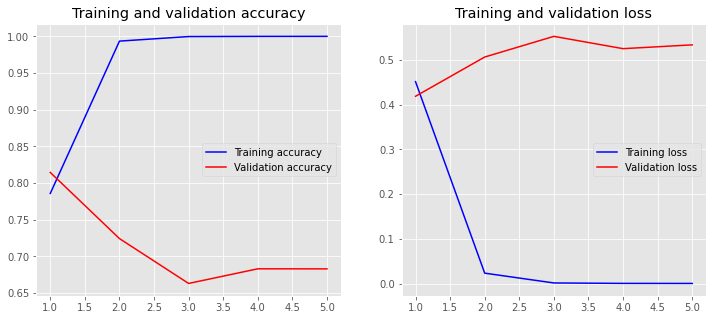

In [17]:

plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training accuracy')
    plt.plot(x, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

%matplotlib inline
plot_history(history)

In [18]:
New_URL = pd.Series(['www.facebook.com'])

In [19]:
# vectorizer = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(1,4),max_features=5000)

features_test = tfidf.transform(New_URL)


NameError: name 'tfidf' is not defined

In [ ]:
New_URL

In [ ]:
predictions = model.predict(features_test)

In [ ]:
predictions

In [ ]:
!pip install Keras